Kaggle is challenging you to build a model that predicts the total ride duration of taxi trips in **New York City**. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.
- https://www.kaggle.com/c/nyc-taxi-trip-duration

# 1. Objectives

1. How do the features interact and relate to one another, and what insights can we uncover from their distributions?
2. Which features demonstrate the strongest correlations, and which have weaker relationships?
3. Why should outliers be removed from the dataset?
4. What are the maximum, minimum, mean, count, and sum of trip durations from 2016?
5. What are the maximum, minimum, mean, and sum of distances from 2016?
6. What are the maximum, minimum, and mean of taxi speeds from 2016?
7. Do trip duration and distance have a linear relationship, such as v = s/t (where t is proportional to s)?
8. Which vendor had the largest number of trip duration in 2016?
9. Which vendor had the larger total distance in 2016?
10. What are the average taxi speeds for each vendor in 2016?
11. How many taxi trips were made by each vendor in 2016?
12. How many taxi trips were there for any trip that was either ordered (pickup) or completed (drop-off) within a 24-hour period in 2016?
13. How many taxi trips were there for any trip that was either ordered (pickup) or completed (drop-off) during different parts of the day in 2016?
14. How many taxi trips were there on weekdays in 2016?
15. How many taxi trips were there each month in 2016?
16. What was the average distance covered by taxis for trips that were either ordered (pickup) or completed (drop-off) within a 24-hour period in 2016?
17. What was the average speed of taxis within a 24-hour period in 2016?
18. Was the number of passengers related to trip duration?
19. Did the number of passengers relate to the available vendors?
20. What was the operational area for taxi trips in 2016?
21. Which areas allowed taxis to send data in real-time?
22. Did the ability to send data in real-time affect taxi trip duration?
23. Did the ability to send data in real-time depend on how far or close the distance was?

# 2. Data preprocessing

In [1]:
from utils_eda import *

In [2]:
df = pd.read_csv("dataset/train.csv")

## 2.1 Creating a New Feature: Distance

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

**distance, great_circle**

Let's calculate distance using the great circle method. A great circle is the shortest path between two points on the surface of a sphere. On Earth, this is often used for measuring distances between two locations based on their latitude and longitude. The method accounts for the curvature of the Earth and provides a more accurate distance than a straight line on a flat map (which would give the "as-the-crow-flies" distance).

In [6]:
df_subset = df.copy().head()  # Take only the first 5 rows

In [7]:
df_subset['distance_gc'] = df_subset.apply(calculate_distance_gc, axis=1)

In [8]:
df_subset.head()['distance_gc']

0    1.498523
1    1.805510
2    6.385108
3    1.485501
4    1.188590
Name: distance_gc, dtype: float64

In [9]:
df_subset = to_speed(df_subset, distance_column='distance_gc', speed_column='speed_gc')

From the data below, we observe that the average speed is approximately 11.0 km/h. However, this calculation uses the `great_circle` function, which estimates the shortest distance between two points on a spherical surface, assuming the Earth is a perfect sphere. While this method provides a reasonable approximation for long distances, such as intercity or international travel, it can lead to inaccuracies over short distances, especially in urban environments. The `great_circle` method measures the straight-line distance, or "as the crow flies," which doesn't account for actual road networks, detours, obstacles, or geographic features.

To improve accuracy, it's necessary to calculate the actual road distance instead of relying on straight-line distance. Tools like OpenStreetMap (OSM) provide detailed road network data, enabling us to compute distances that reflect real-world driving paths. By integrating these road distances, we can recalculate the average speed to represent realistic travel routes and times, offering a more accurate depiction of vehicle movement.

In [10]:
df_subset.head()[['trip_duration', 'distance_gc', 'speed_gc']]

,trip_duration,distance_gc,speed_gc
0,455,1.498523,11.856445
1,663,1.805510,9.803673
2,2124,6.385108,10.822216
3,429,1.485501,12.465739
4,435,1.188590,9.836608


In [11]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df_subset.describe()['speed_gc'])

count    5.000
mean    10.957
std      1.193
min      9.804
25%      9.837
50%     10.822
75%     11.856
max     12.466
Name: speed_gc, dtype: float64


**distance, osmnx**

Calculating actual road distances using OpenStreetMap (OSM) data with OSMNX library, which interfaces with OSM to get the network and calculate road distances.

In [12]:
df_subset = cal_road_distance_osmnx(df_subset)

In [13]:
df_subset = to_speed(df_subset, distance_column='distance_osmnx', speed_column='speed_osmnx')

In [14]:
df_subset.iloc[:, -4:].head()

,distance_gc,speed_gc,distance_osmnx,speed_osmnx
0,1.498523,11.856445,1.967594,15.567777
1,1.805510,9.803673,2.500146,13.575453
2,6.385108,10.822216,7.239872,12.270969
3,1.485501,12.465739,1.708266,14.335099
4,1.188590,9.836608,1.747517,14.462210


The analysis using OpenStreetMap (OSM) data with the OSMnx library shows that the calculated average speed was only 14 km/hour. This result reflects the data from OSMnx, which is more focused on network structure and may not accurately represent real-world travel speeds, as it doesn't account for specific driving conditions such as traffic, road type, or speed limits.

To enhance the accuracy of our speed calculation, we will now compare this result with OSRM (Open Source Routing Machine). OSRM is a routing engine that uses OSM data but includes factors like actual road speeds, traffic rules, and driving conditions, providing a more realistic estimate of travel time and average speed. By comparing the results from both OSMnx and OSRM, we can determine the discrepancies and assess the impact of real-world conditions on travel speeds.

In [15]:
df_subset.describe()['speed_osmnx']

count     5.000000
mean     14.042302
std       1.219087
min      12.270969
25%      13.575453
50%      14.335099
75%      14.462210
max      15.567777
Name: speed_osmnx, dtype: float64

**distance, osrm**

In [16]:
df_subset = cal_road_distance_osrm(df_subset)

Processing row 0 of 5...


In [17]:
df_subset = to_speed(df_subset)

In [18]:
df_subset.iloc[:, -6:].head()

,distance_gc,speed_gc,distance_osmnx,speed_osmnx,distance_osrm,speed_osrm
0,1.498523,11.856445,1.967594,15.567777,2.1597,17.087736
1,1.805510,9.803673,2.500146,13.575453,2.5118,13.638733
2,6.385108,10.822216,7.239872,12.270969,9.9346,16.838305
3,1.485501,12.465739,1.708266,14.335099,1.7766,14.908531
4,1.188590,9.836608,1.747517,14.462210,1.6066,13.296000


In [19]:
df_subset.describe()['speed_osrm']

count     5.000000
mean     15.153861
std       1.759593
min      13.296000
25%      13.638733
50%      14.908531
75%      16.838305
max      17.087736
Name: speed_osrm, dtype: float64

**distance, google maps (manual)**

In [20]:
print(df_subset[["pickup_longitude","pickup_latitude", "dropoff_longitude", "dropoff_latitude"]])

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
0        -73.982155        40.767937         -73.964630         40.765602
1        -73.980415        40.738564         -73.999481         40.731152
2        -73.979027        40.763939         -74.005333         40.710087
3        -74.010040        40.719971         -74.012268         40.706718
4        -73.973053        40.793209         -73.972923         40.782520


speed = distance/time

- https://www.google.com/maps/dir/40.767937,-73.982155/40.765602,-73.964630
- distance1 = 2 km
- time1 = 5 mins

* https://www.google.com/maps/dir/40.738564,-73.980415/40.731152,-73.999481
* distance2 = 2.5 km
* time2 = 6 mins

- https://www.google.com/maps/dir/40.763939,-73.979027/40.710087,-74.005333
- distance3 = 11.1 km
- time3 = 16 mins

* https://www.google.com/maps/dir/40.719971,-74.010040/40.706718,-74.012268
* distance4 = 1.8 km
* time4 = 6 mins

- https://www.google.com/maps/dir/40.793209,-73.973053/40.782520,-73.972923
- distance5 = 1.6 km
- time5 = 4 mins

![gmaps](img/gmaps.png)

In [21]:
df_gmaps = {
    'time_gmaps': [5*60, 6*60, 16*60, 6*60, 4*60],
    'distance_gmaps': [2.0, 2.5, 11.1, 1.8, 1.6]
}

df_gmaps_df = pd.DataFrame(df_gmaps)

In [22]:
df_subset[['time_gmaps', 'distance_gmaps']] = df_gmaps_df[['time_gmaps', 'distance_gmaps']]

In [23]:
df_subset = to_speed(df_subset, distance_column='distance_gmaps', speed_column='speed_gmaps', time_column='time_gmaps')

**Comparative Analysis**
- The distances calculated using the great-circle method (`distance_gc`) do not closely match the distances obtained from the OpenStreetMap network (`distance_osmnx`), OSRM (`distance_osrm`), and Google Maps (`distance_gmaps`).
- A significant issue arises when comparing `trip_duration` from our dataset with `time_gmaps` (estimated time from Google Maps), as discrepancies in these time measurements lead to substantial differences in calculated speeds.
- Specifically, the differences in trip durations affect the computed speeds, resulting in considerable variations. For instance, the speeds calculated from the great-circle method (`speed_gc`) show lower values compared to those from OpenStreetMap distances (`speed_osmnx`), OSRM (`speed_osrm`), and Google Maps (`speed_gmaps`).
- Notably, the speeds derived from OSMNX (`speed_osmnx`) and OSRM (`speed_osrm`) are generally more consistent and closely aligned with those from Google Maps (`speed_gmaps`). This alignment suggests that OSMNX and OSRM provide reliable estimates, making them preferable choices for further analysis. Their integration of real-world factors such as actual road conditions, traffic rules, and driving conditions enhances the accuracy of distances, setting them apart from the other methods.
- Additionally, it is important to note that we cannot use the Google Maps API due to its high cost. As we have identified that the primary issue lies in the **time discrepancies** rather than the distance measurements, it is prudent to utilize free open-source alternatives like OSRM. This approach not only mitigates costs but also maintains accuracy in our analysis.

In [24]:
df_subset[["trip_duration", "time_gmaps", "distance_gc", "distance_osmnx", "distance_osrm", "distance_gmaps", 
           "speed_gc", "speed_osmnx", "speed_osrm", "speed_gmaps"]]

,trip_duration,time_gmaps,distance_gc,distance_osmnx,distance_osrm,distance_gmaps,speed_gc,speed_osmnx,speed_osrm,speed_gmaps
0,455,300,1.498523,1.967594,2.1597,2.0,11.856445,15.567777,17.087736,24.000
1,663,360,1.805510,2.500146,2.5118,2.5,9.803673,13.575453,13.638733,25.000
2,2124,960,6.385108,7.239872,9.9346,11.1,10.822216,12.270969,16.838305,41.625
3,429,360,1.485501,1.708266,1.7766,1.8,12.465739,14.335099,14.908531,18.000
4,435,240,1.188590,1.747517,1.6066,1.6,9.836608,14.462210,13.296000,24.000


**recalculating distance using osmnx method**

In [25]:
# 50 sample
df_50 = df.copy()

In [26]:
df_50 = df_50.head(50)

In [27]:
%%time
df_50 = cal_road_distance_osmnx(df_50)

CPU times: total: 2min 47s
Wall time: 2min 56s


50 samples = 150 seconds

In [28]:
# the result is in second
(150/50)*1458644

4375932.0

In [29]:
(4375932/3600)/24

50.64736111111111

The estimated processing time for calculating distances is approximately **50 days**, which is not feasible. We can revisit this task later if we gain access to more efficient computational resources.

**recalculating distance using osrm method**

In [30]:
# 200 sample
df_200 = df.copy()

In [31]:
df_200 = df_200.head(200)

In [32]:
%%time
df_200 = cal_road_distance_osrm(df_200)

Processing row 0 of 200...
Processing row 100 of 200...
CPU times: total: 1.61 s
Wall time: 1min 45s


200 samples = 100 seconds

In [33]:
df.shape

(1458644, 11)

x / 1458644 = 100 seconds / 200 samples

In [34]:
# the result is in second
(100/200)*1458644

729322.0

In [35]:
(729322/3600)/24

8.441226851851852

The estimated processing time for the distance calculation is approximately **8 days**, which is impractical. 

It seems worthwhile to recalculate the distance using the OSRM method, which is more advanced and efficient compared to the OSMnx method. OSRM (Open Source Routing Machine) is specifically optimized for fast routing calculations on road networks, while OSMnx, although powerful for graph analysis and network extraction, can be slower for large-scale routing computations.

Given this, I decided to **install OSRM locally** and recalculate the distances using its more optimized algorithms for better performance.

**recalculating the distance using the OSRM method locally**

In [36]:
# %%time
# # running time = 4-5 hours
# df = cal_road_distance_osrm_local(df)

In [37]:
# df.to_csv('csv_eda/distance_osrm.csv', index=False)

In [38]:
df = pd.read_csv("csv_eda/distance_osrm.csv")

In [39]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.1587
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.5113
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,9.9354
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.7776
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.6064


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
 11  distance_osrm       1458627 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 133.5+ MB


## 2.2 Calculating the Distance from NYC center

**calculating the distance from NYC center [40.7128, -74.0060] to restrict the operational area around NYC**

In [41]:
# %%time
# # running time = 20 minutes
# df = distance_from_NYC_center(df)

In [42]:
# df.to_csv('csv_eda/eda_01.csv', index=False)

In [43]:
df = pd.read_csv("csv_eda/eda_01.csv")

In [44]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm,pickup_dist_NYC_center,dropoff_dist_NYC_center
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.1587,6.445619,6.825864
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.5113,3.585708,2.111028
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,9.9354,6.118901,0.306521
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.7776,0.866388,0.858280
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.6064,9.352795,8.230915


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1458644 non-null  object 
 1   vendor_id                1458644 non-null  int64  
 2   pickup_datetime          1458644 non-null  object 
 3   dropoff_datetime         1458644 non-null  object 
 4   passenger_count          1458644 non-null  int64  
 5   pickup_longitude         1458644 non-null  float64
 6   pickup_latitude          1458644 non-null  float64
 7   dropoff_longitude        1458644 non-null  float64
 8   dropoff_latitude         1458644 non-null  float64
 9   store_and_fwd_flag       1458644 non-null  object 
 10  trip_duration            1458644 non-null  int64  
 11  distance_osrm            1458627 non-null  float64
 12  pickup_dist_NYC_center   1458644 non-null  float64
 13  dropoff_dist_NYC_center  1458644 non-null 

## 2.3 Removing Duplicate Data

In [46]:
df.duplicated().sum().sum()

0

## 2.4 Checking for Error Data

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1458644 non-null  object 
 1   vendor_id                1458644 non-null  int64  
 2   pickup_datetime          1458644 non-null  object 
 3   dropoff_datetime         1458644 non-null  object 
 4   passenger_count          1458644 non-null  int64  
 5   pickup_longitude         1458644 non-null  float64
 6   pickup_latitude          1458644 non-null  float64
 7   dropoff_longitude        1458644 non-null  float64
 8   dropoff_latitude         1458644 non-null  float64
 9   store_and_fwd_flag       1458644 non-null  object 
 10  trip_duration            1458644 non-null  int64  
 11  distance_osrm            1458627 non-null  float64
 12  pickup_dist_NYC_center   1458644 non-null  float64
 13  dropoff_dist_NYC_center  1458644 non-null 

In [48]:
df["id"].value_counts().sort_index()

id0000001    1
id0000003    1
id0000005    1
id0000008    1
id0000009    1
            ..
id3999988    1
id3999992    1
id3999998    1
id3999999    1
id4000000    1
Name: id, Length: 1458644, dtype: int64

In [49]:
# Regular expression checks to find error entries in this format: "id + 7 digits"
pattern = r'^id\d{7}$'

df_check = df.copy()

df_check['valid_format'] = df_check['id'].str.match(pattern)

# Extract rows with invalid format
invalid_entries = df_check[~df_check['valid_format']]
invalid_entries

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm,pickup_dist_NYC_center,dropoff_dist_NYC_center,valid_format


In [50]:
df["vendor_id"].value_counts().sort_index()

1    678342
2    780302
Name: vendor_id, dtype: int64

In [51]:
df["pickup_datetime"].value_counts().sort_index()

2016-01-01 00:00:17    1
2016-01-01 00:00:53    1
2016-01-01 00:01:01    1
2016-01-01 00:01:14    1
2016-01-01 00:01:20    1
                      ..
2016-06-30 23:58:52    1
2016-06-30 23:59:09    1
2016-06-30 23:59:10    1
2016-06-30 23:59:37    1
2016-06-30 23:59:39    1
Name: pickup_datetime, Length: 1380222, dtype: int64

In [52]:
df_check['valid_datetime'] = pd.to_datetime(df_check['pickup_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

invalid_entries = df_check[df_check['valid_datetime'].isna()]
invalid_entries

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm,pickup_dist_NYC_center,dropoff_dist_NYC_center,valid_format,valid_datetime


In [53]:
df_check['valid_datetime_2'] = pd.to_datetime(df_check['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

invalid_entries = df_check[df_check['valid_datetime_2'].isna()]
invalid_entries

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm,pickup_dist_NYC_center,dropoff_dist_NYC_center,valid_format,valid_datetime,valid_datetime_2


In [54]:
df['passenger_count'].value_counts().sort_index()

0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: passenger_count, dtype: int64

In [55]:
df['pickup_longitude'].value_counts().sort_index()

-121.933342    1
-121.933235    1
-79.569733     1
-79.487900     1
-78.547401     1
              ..
-68.778435     1
-66.972160     1
-65.897385     1
-65.848389     1
-61.335529     1
Name: pickup_longitude, Length: 23047, dtype: int64

In [56]:
df['pickup_latitude'].value_counts().sort_index()

34.359695    1
34.712234    1
35.081532    1
35.310307    1
36.029301    1
            ..
43.139652    1
43.486885    1
43.911762    1
44.371944    1
51.881084    1
Name: pickup_latitude, Length: 45245, dtype: int64

In [57]:
df['dropoff_longitude'].value_counts().sort_index()

-121.933304    1
-121.933205    1
-80.355431     1
-79.817978     1
-79.786133     1
              ..
-69.048019     1
-68.778435     1
-65.897385     1
-65.848389     1
-61.335529     1
Name: dropoff_longitude, Length: 33821, dtype: int64

In [58]:
df['dropoff_latitude'].value_counts().sort_index()

32.181141    1
34.359695    1
35.173546    1
36.029301    1
36.118538    1
            ..
43.147583    1
43.486885    1
43.674000    1
43.911762    1
43.921028    1
Name: dropoff_latitude, Length: 62519, dtype: int64

In [59]:
df['store_and_fwd_flag'].value_counts().sort_index()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [60]:
df['trip_duration'].value_counts().sort_index()

1           33
2          177
3          318
4          317
5          284
          ... 
86392        1
1939736      1
2049578      1
2227612      1
3526282      1
Name: trip_duration, Length: 7417, dtype: int64

In [61]:
df['distance_osrm'].value_counts().sort_index()

0.0000      6359
0.0001        99
0.0002        94
0.0003       114
0.0004       126
            ... 
671.3516       1
671.6565       1
690.2296       1
716.3777       1
765.6445       1
Name: distance_osrm, Length: 195046, dtype: int64

In [62]:
df['pickup_dist_NYC_center'].value_counts().sort_index()

0.019591       1
0.047589       1
0.059175       1
0.060096       1
0.060147       1
              ..
1007.579202    1
1137.270814    1
1244.803525    1
4113.674805    1
4113.680417    1
Name: pickup_dist_NYC_center, Length: 1381253, dtype: int64

In [63]:
df['dropoff_dist_NYC_center'].value_counts().sort_index()

0.036546       1
0.054800       1
0.067483       1
0.067691       1
0.067758       1
              ..
946.864168     1
1007.579202    1
1137.270814    1
4113.672225    1
4113.679811    1
Name: dropoff_dist_NYC_center, Length: 1417752, dtype: int64

**Conclusion**
- There are no error formats in this dataset.

## 2.5 Detecting Missing Values

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1458644 non-null  object 
 1   vendor_id                1458644 non-null  int64  
 2   pickup_datetime          1458644 non-null  object 
 3   dropoff_datetime         1458644 non-null  object 
 4   passenger_count          1458644 non-null  int64  
 5   pickup_longitude         1458644 non-null  float64
 6   pickup_latitude          1458644 non-null  float64
 7   dropoff_longitude        1458644 non-null  float64
 8   dropoff_latitude         1458644 non-null  float64
 9   store_and_fwd_flag       1458644 non-null  object 
 10  trip_duration            1458644 non-null  int64  
 11  distance_osrm            1458627 non-null  float64
 12  pickup_dist_NYC_center   1458644 non-null  float64
 13  dropoff_dist_NYC_center  1458644 non-null 

The dataset has 1.4 million rows with only 17 missing values in `distance_osrm` (~0.0012%). I will drop these rows since their impact is negligible and imputation introduces unnecessary complexity for such a small proportion. If missing values were 5-10%, I would consider imputation to preserve data completeness.

In [65]:
df.isna().sum().sum()

17

In [66]:
# Save the NaN rows to a csv file for further analysis
nan_rows = df[df['distance_osrm'].isna()]
nan_rows.to_csv('csv_eda/nan_rows_eda.csv', index=False)

In [67]:
df = df.dropna(subset=['distance_osrm'])

In [68]:
df.isna().sum().sum()

0

In [69]:
df.shape

(1458627, 14)

## 2.6 Creating a New Feature: Speed

**speed, osrm**

In [70]:
df = to_speed(df)

In [71]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm,pickup_dist_NYC_center,dropoff_dist_NYC_center,speed_osrm
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.1587,6.445619,6.825864,17.079824
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.5113,3.585708,2.111028,13.636018
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,9.9354,6.118901,0.306521,16.839661
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.7776,0.866388,0.858280,14.916923
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.6064,9.352795,8.230915,13.294345


Let's revisit our `df_subset` dataframe. As previously mentioned, a critical challenge emerges when we compare `trip_duration` from the dataset with `time_gmaps`, which represents the estimated duration from Google Maps. These discrepancies result in significant variations in the calculated speeds. Such variations may arise due to different factors: traffic conditions, taxi behavior (e.g., stopping for passengers), or road closures and detours not accounted for during the trip. These factors should be accounted for when interpreting results.

Furthermore, from the table below, the average speed derived from `speed_osrm` is **19.47 km/h**. While this provides a baseline, it's important to contextualize this value against New York City's typical traffic patterns and speed limits. The city's congestion, frequent stops, and potential inefficiencies in routes mean that deviations from this average are expected. Therefore, it is crucial to assess whether this average aligns with realistic expectations for taxi travel in NYC.

**By further exploring** outliers or extreme deviations, we could uncover patterns or systemic issues in specific routes, times of day, or regions, enhancing the predictive power of our machine learning model.

In [72]:
df_subset[["trip_duration", "time_gmaps", "distance_osrm", "distance_gmaps", "speed_osrm", "speed_gmaps"]]

,trip_duration,time_gmaps,distance_osrm,distance_gmaps,speed_osrm,speed_gmaps
0,455,300,2.1597,2.0,17.087736,24.000
1,663,360,2.5118,2.5,13.638733,25.000
2,2124,960,9.9346,11.1,16.838305,41.625
3,429,360,1.7766,1.8,14.908531,18.000
4,435,240,1.6066,1.6,13.296000,24.000


In [73]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df.describe()["speed_osrm"])

count   1458627.000
mean         19.477
std          31.748
min           0.000
25%          12.361
50%          16.986
75%          23.253
max       12246.891
Name: speed_osrm, dtype: float64


## 2.7 Data Transformation

**datetime**

In [74]:
df["pickup_datetime"].head()

0    2016-03-14 17:24:55
1    2016-06-12 00:43:35
2    2016-01-19 11:35:24
3    2016-04-06 19:32:31
4    2016-03-26 13:30:55
Name: pickup_datetime, dtype: object

Since the data only contains trips from a single year (2016), these features do not provide any variability or additional value for the machine learning model and should be excluded
- `pickup_datetime_year`
- `dropoff_datetime_year`

In [75]:
df = datetime_transform(df)

In [76]:
df = df.drop(['pickup_datetime_year', 'dropoff_datetime_year'], axis=1)

In [77]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_osrm,...,dropoff_dist_NYC_center,speed_osrm,pickup_datetime_month,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,dropoff_datetime_month,dropoff_datetime_hour,dropoff_datetime_weekday,dropoff_datetime_period
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.1587,...,6.825864,17.079824,3,17,Monday,Evening,3,17,Monday,Evening
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.5113,...,2.111028,13.636018,6,0,Sunday,Early Morning,6,0,Sunday,Early Morning
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,9.9354,...,0.306521,16.839661,1,11,Tuesday,Morning,1,12,Tuesday,Afternoon
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.7776,...,0.858280,14.916923,4,19,Wednesday,Evening,4,19,Wednesday,Evening
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.6064,...,8.230915,13.294345,3,13,Saturday,Afternoon,3,13,Saturday,Afternoon


---

In [78]:
df.to_csv('csv_eda/eda_02.csv', index=False)

In [79]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

## 2.8 Converting Data Types

In [2]:
df = pd.read_csv("csv_eda/eda_02.csv")

**vendor_id, datetime_month, datetime_hour**

In [3]:
cols_to_convert = ['vendor_id', 'pickup_datetime_month', 'pickup_datetime_hour', 
                   'dropoff_datetime_month', 'dropoff_datetime_hour']

In [4]:
df[cols_to_convert] = df[cols_to_convert].astype('object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458627 entries, 0 to 1458626
Data columns (total 21 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1458627 non-null  object 
 1   vendor_id                 1458627 non-null  object 
 2   passenger_count           1458627 non-null  int64  
 3   pickup_longitude          1458627 non-null  float64
 4   pickup_latitude           1458627 non-null  float64
 5   dropoff_longitude         1458627 non-null  float64
 6   dropoff_latitude          1458627 non-null  float64
 7   store_and_fwd_flag        1458627 non-null  object 
 8   trip_duration             1458627 non-null  int64  
 9   distance_osrm             1458627 non-null  float64
 10  pickup_dist_NYC_center    1458627 non-null  float64
 11  dropoff_dist_NYC_center   1458627 non-null  float64
 12  speed_osrm                1458627 non-null  float64
 13  pickup_datetime_month     1

## 2.9 Detecting and Handling Outliers

In the `trip_duration` column, I observe some suspiciously large maximum values. For example, the maximum value recorded is **3,526,282 seconds**, which translates to nearly **40 days** of trip duration. This is highly unusual for a taxi trip and likely represents erroneous data or outliers.

To better understand this, we can visualize the distribution of trip durations to see how these extreme values compare to the typical trip durations.

In [6]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df.describe())

       passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
count      1458627.000       1458627.000      1458627.000        1458627.000   
mean             1.665           -73.973           40.751            -73.973   
std              1.314             0.071            0.033              0.071   
min              0.000          -121.933           34.360           -121.933   
25%              1.000           -73.992           40.737            -73.991   
50%              1.000           -73.982           40.754            -73.980   
75%              2.000           -73.967           40.768            -73.963   
max              9.000           -61.336           51.881            -61.336   

       dropoff_latitude  trip_duration  distance_osrm  pickup_dist_NYC_center  \
count       1458627.000    1458627.000    1458627.000             1458627.000   
mean             40.752        959.501          4.619                   5.738   
std               0.036       5237.4

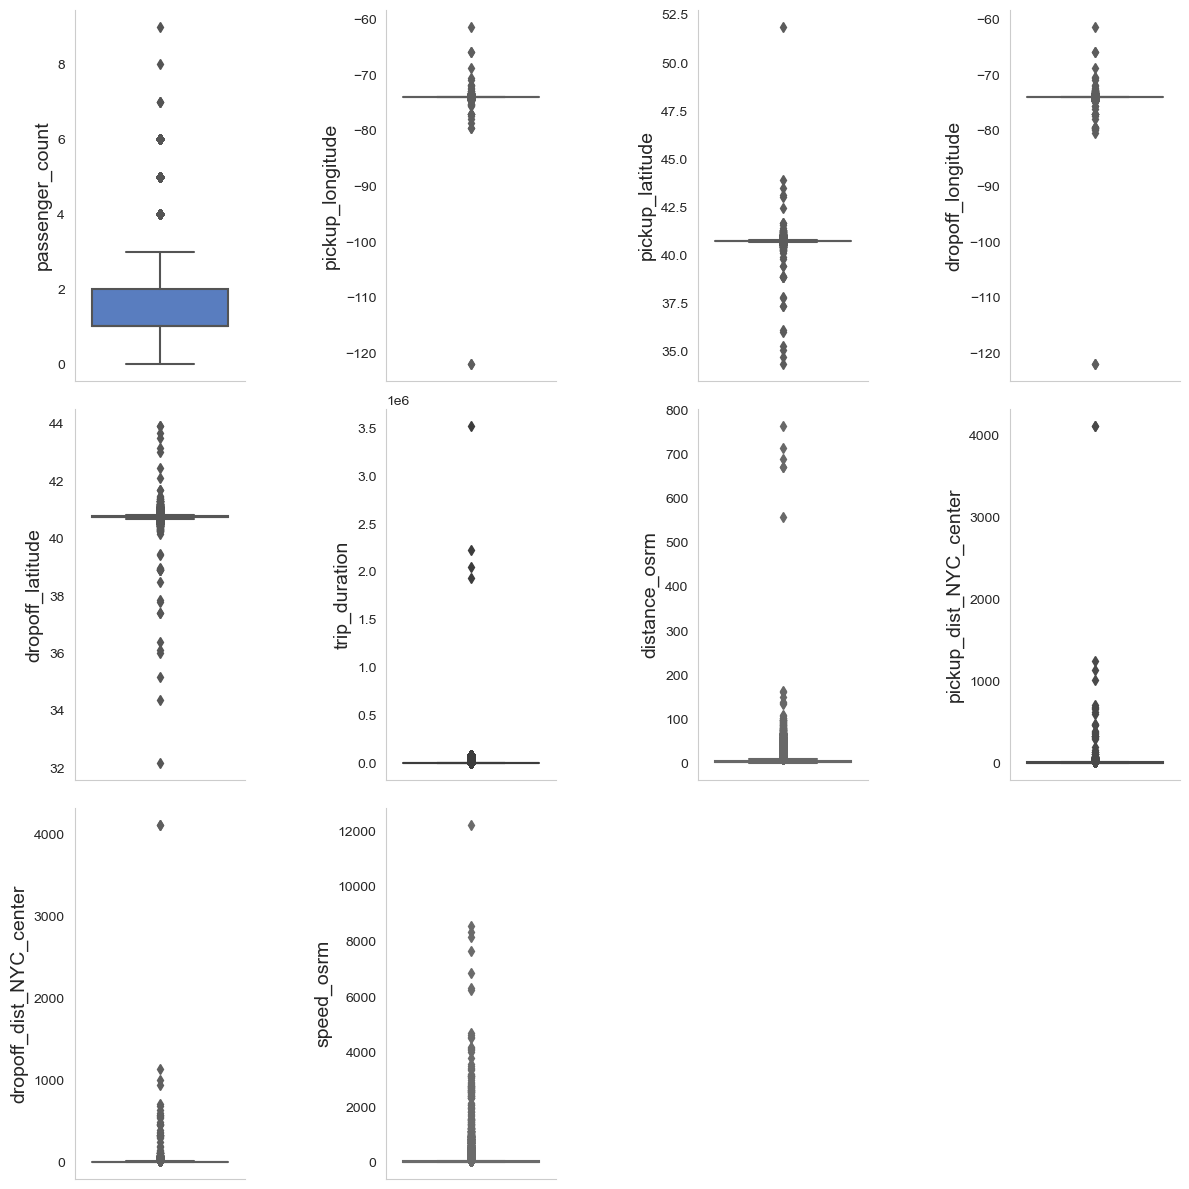

In [7]:
outliers_graph(df, df.columns.to_list())

### 2.9.1 Restricting trip_duration, distance_osrm, and speed_osrm

#### trip_duration

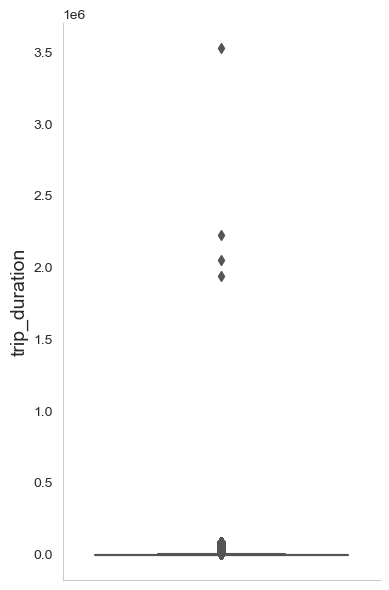

In [8]:
outliers_graph(df, ["trip_duration"])

##### maximum trip_duration

In this dataframe below, we observe that one of the trip_duration values is **1,939,736 seconds**, which translates to approximately **22 days**. This is highly unusual for typical taxi trips, as such long durations are likely outliers or data errors. To maintain a more accurate and representative dataset, we should remove these extreme outliers.

In [9]:
df[df["trip_duration"] > 1.5 * 10**6][['id','trip_duration']]

,id,trip_duration
354996,id1864733,1939736
680583,id0369307,2049578
924136,id1325766,2227612
978369,id0053347,3526282


Let's restrict the maximum trip duration to only one day.

In [10]:
df = df[df["trip_duration"] <= 86400]

In [11]:
# check again
df[df["trip_duration"] > 86400][['id','trip_duration']].count()

id               0
trip_duration    0
dtype: int64

In [12]:
df["trip_duration"].max()

86392

In [13]:
# in hour
df["trip_duration"].max()/3600

23.997777777777777

##### minimum trip_duration

For the minimum trip duration, let's limit it to include only trips that are 60 seconds or longer, as trips shorter than 60 seconds are often too brief to be realistic. Such short trips could represent errors, incomplete trips, or anomalies like immediate cancellations or very short distances that are not typical of standard taxi trips. Additionally, since we have derived speed from the trip's duration and distance, any outliers or errors in the trip duration will directly impact the accuracy of the calculated speed.

In [14]:
df[df["trip_duration"] < 60][['id','trip_duration']].count()

id               8584
trip_duration    8584
dtype: int64

In [15]:
df = df[df["trip_duration"] >= 60]

In [16]:
# check again
df[df["trip_duration"] < 60][['id','trip_duration']].count()

id               0
trip_duration    0
dtype: int64

In [17]:
df["trip_duration"].min()

60

#### distance_osrm

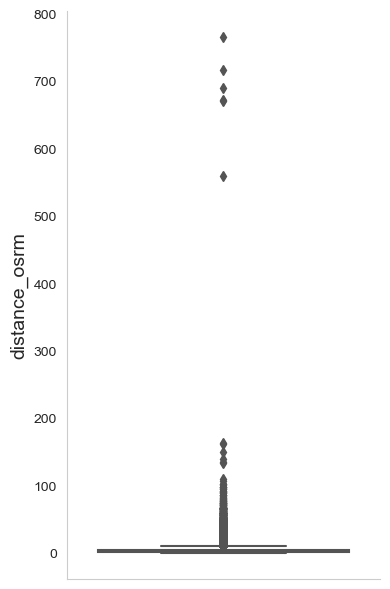

In [18]:
outliers_graph(df, ["distance_osrm"])

##### maximum distance_osrm

To foster better regional connectivity and economic integration, it's essential to evaluate the reach of key hubs within and around New York City. Although the direct distance between points like the Bronx and Staten Island or JFK Airport is around 50 to 60 km, extending the range to 100 km allows us to include critical neighboring areas. This extension captures important cross-border interactions with parts of New Jersey, Long Island, and southern Connecticut. By doing so, we not only account for the city's internal dynamics but also enhance our understanding of the broader commuter belt, regional infrastructure, and socio-economic linkages. Thus, setting a maximum distance of 100 km helps us analyze the full spectrum of urban and regional interactions comprehensively.

In [19]:
df = df[df["distance_osrm"] <= 100]

In [20]:
df["distance_osrm"].max()

98.144

##### minimum distance_osrm

I will classify taxi trips with distances less than 100 meters (0.1 km) as outliers and remove them from the dataset. This classification is based on the fact that such distances are highly improbable for a typical taxi ride.

A distance of 100 meters or less is extremely short and may not allow enough time for the taxi to move between passengers, reach the next block, or justify the trip. Additionally, many taxi services have minimum fare policies or distance thresholds, making such short trips unrealistic. Therefore, these observations are likely data entry errors or rare exceptions and should be excluded from further analysis to ensure the accuracy and relevance of the results.

In [21]:
df[df["distance_osrm"] < 0.1][['id','distance_osrm']].count()

id               5961
distance_osrm    5961
dtype: int64

In [22]:
df = df[df["distance_osrm"] >= 0.1]

In [23]:
# check again
df[df["distance_osrm"] < 0.1][['id','distance_osrm']].count()

id               0
distance_osrm    0
dtype: int64

In [24]:
df["distance_osrm"].min()

0.1001

#### speed_osrm

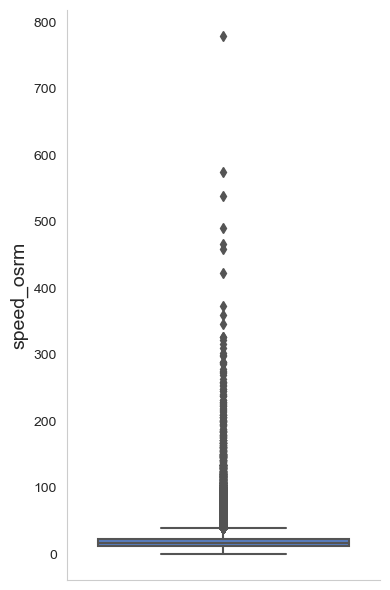

In [25]:
outliers_graph(df, ['speed_osrm'])

##### maximum speed_osrm

Since the taxi speed is calculated independently using the formula `v = s/t` (where speed `v` is derived from the distance `s` traveled divided by the trip duration `t`), we can set a reasonable limit based on safety, legal regulations, and practical vehicle performance.

Speeds above 130 km/h are generally outliers and can be considered unrealistic for the following reasons:
- Safety concerns: Driving at such high speeds significantly increases the risk of accidents. Taxis are typically expected to prioritize passenger safety and comfort over speed.
- Legal restrictions: In most urban and highway environments, speed limits are set well below 130 km/h. Exceeding these limits is illegal and could result in penalties or license suspension for drivers.
- Vehicle design: Standard taxi vehicles are not designed to sustain such high speeds for long periods. Taxi fleets are often chosen for reliability, efficiency, and fuel economy, not high-speed performance.
- Passenger experience: Traveling at excessive speeds can be uncomfortable and undesirable for passengers, making it impractical for taxi drivers to maintain speeds above 130 km/h.

In [26]:
df[df["speed_osrm"] > 130][['id','speed_osrm']].count()

id            201
speed_osrm    201
dtype: int64

In [27]:
df = df[df["speed_osrm"] <= 130]

In [28]:
df[df["speed_osrm"] > 130][['id','speed_osrm']].count()

id            0
speed_osrm    0
dtype: int64

In [29]:
df["speed_osrm"].max()

129.96595041322314

##### minimum speed_osrm

I also set the lower bound limit for speed to 3 km/h because speeds below this threshold are likely to represent extreme congestion, prolonged idling, or abnormal conditions such as extended stops, which are not reflective of typical taxi movement patterns in NYC. By setting this limit, I aim to filter out outliers that could skew the analysis of average taxi speeds.

In [30]:
df[df["speed_osrm"] < 3][['id','speed_osrm']].count()

id            6626
speed_osrm    6626
dtype: int64

In [31]:
df = df[df["speed_osrm"] >= 3]

In [32]:
# check again
df[df["speed_osrm"] < 3][['id','speed_osrm']].count()

id            0
speed_osrm    0
dtype: int64

In [33]:
df["speed_osrm"].min()

3.0

#### passenger_count

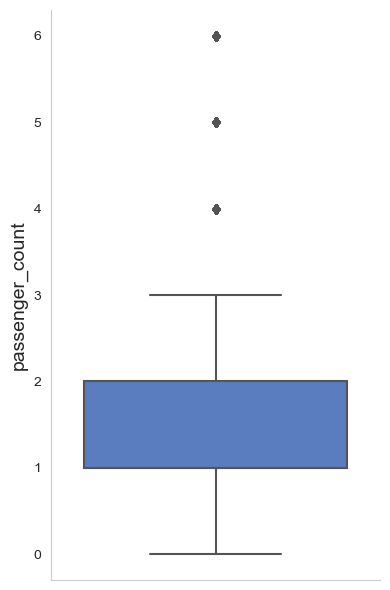

In [34]:
outliers_graph(df, ['passenger_count'])

The dataset for taxi trip durations contains over 1.4 million rows, but I have identified that some rows contain a passenger count of 0. This is an unrealistic value for a taxi trip, as it implies that no passengers were present during the trip. These entries could be due to data entry errors or exceptional cases that do not align with the real-world scenario we are analyzing. 

Removing these rows will ensure that our analysis and modeling are not influenced by unrealistic data, improving the quality and reliability of the results. Since the 0 passenger count rows make up a very small fraction (about 13 rows out of 1.4 million, or 0.0009%), the impact on the dataset size and the subsequent analysis will be negligible.

Let's proceed with the removal of these rows to ensure data integrity.

In [35]:
df['passenger_count'].value_counts()

1    1017997
2     207539
5      77010
3      59109
6      47568
4      27998
0         13
Name: passenger_count, dtype: int64

In [36]:
df = df[df['passenger_count'] != 0]

In [37]:
# check again
df['passenger_count'].value_counts()

1    1017997
2     207539
5      77010
3      59109
6      47568
4      27998
Name: passenger_count, dtype: int64

#### Save the outliers to a CSV file

In [38]:
df_init = pd.read_csv("csv_eda/eda_01.csv")
df_init = to_speed(df_init)

In [39]:
df_init.shape

(1458644, 15)

In [40]:
outliers_trip_duration = df_init[((df_init["trip_duration"] < 60) | (df_init["trip_duration"] > 1.5 * 10**6))]
outliers_trip_duration.to_csv('csv_eda/outliers_trip_duration.csv', index=False)
outliers_trip_duration.shape

(8599, 15)

In [41]:
outliers_distance_osrm = df_init[(df_init["distance_osrm"] < 0.1) | (df_init["distance_osrm"] > 100)]
outliers_distance_osrm.to_csv('csv_eda/outliers_distance_osrm.csv', index=False)
outliers_distance_osrm.shape

(10663, 15)

In [42]:
outliers_speed_osrm = df_init[(df_init["speed_osrm"] < 3) | (df_init["speed_osrm"] > 130)]
outliers_speed_osrm.to_csv('csv_eda/outliers_speed_osrm.csv', index=False)
outliers_speed_osrm.shape

(16963, 15)

In [43]:
outliers_passenger_count = df_init[df_init['passenger_count'] == 0]
outliers_passenger_count.to_csv('csv_eda/outliers_passenger_count.csv', index=False)
outliers_passenger_count.shape

(60, 15)

### 2.9.2 Restricting the taxi operational area to around NYC

#### pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude

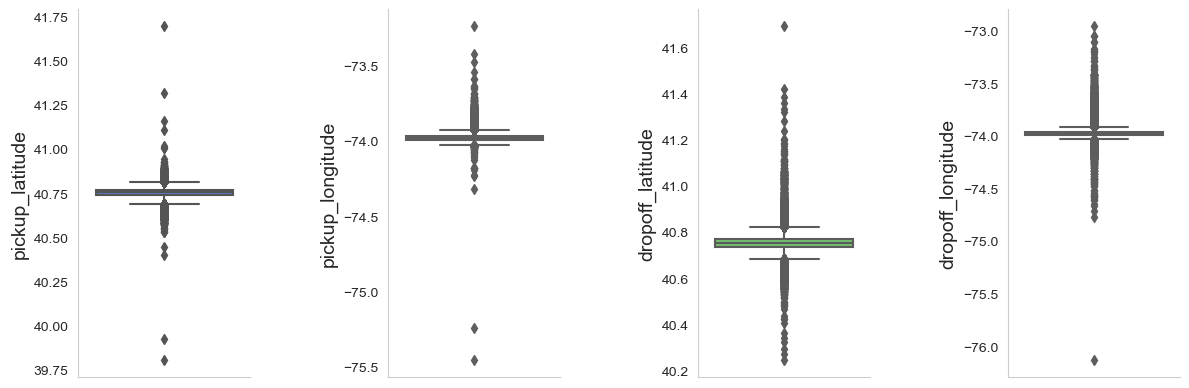

In [44]:
outliers_graph(df, ["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"])

To refine the dataset and enhance its relevance, I will restrict taxi operations in New York City to a radius of 50 kilometers from the central coordinates `(40.7128, -74.0060)`. Any pickup or drop-off points outside this radius will be identified as outliers. This restriction ensures that both the current and unseen datasets remain consistent and focused within this defined geographical boundary, making the dataset more practical and reliable for analysis. This approach will help to eliminate noise and irrelevant data, thereby improving the overall quality and interpretability of the results.

In [45]:
X = df.drop(columns=['trip_duration'])
y = df['trip_duration']

In [46]:
%%time
outlier_mapper = OutlierMapper(map_title="outliers_map_eda", csv_dir="csv_eda")
X, y = outlier_mapper.transform(X, y)

--- Identifying Outliers on the Map ---
Outliers saved to 'csv_eda\outliers_map_eda.csv'
Map saved as 'html/outliers_map_eda.html'
Removed 86 (0.01%) records outside NYC boundaries.
CPU times: total: 3.31 s
Wall time: 3.85 s


In [47]:
df = pd.concat([X, y], axis=1)

#### Save the outliers to a CSV file

In [48]:
df_init = pd.read_csv("csv_eda/eda_01.csv")
df_init = to_speed(df_init)

In [49]:
df_init.shape

(1458644, 15)

In [50]:
X = df_init.drop(columns=['trip_duration'])
y = df_init['trip_duration']

In [51]:
%%time
outlier_mapper = OutlierMapper(map_title="outliers_map_eda_df_init", csv_dir="csv_eda")
X, y = outlier_mapper.transform(X, y)

--- Identifying Outliers on the Map ---
Outliers saved to 'csv_eda\outliers_map_eda_df_init.csv'
Map saved as 'html/outliers_map_eda_df_init.html'
Removed 180 (0.01%) records outside NYC boundaries.
CPU times: total: 2.59 s
Wall time: 2.8 s


---

#### Summary of Data Removal
- I have removed a total of 1.47% of data from the dataset to ensure the integrity and accuracy of the analysis.
- A typical range for data removal is usually between 5-10%, depending on the data quality and the context. In this case, removing 1.47% of the dataset is appropriate for a large urban taxi system like NYC, where NaN entries in distance and extreme trip values (too short, too long, too fast, or too slow) could distort the analysis. This removal still preserves enough data to ensure a robust analysis of typical taxi operations.

In [52]:
(df_init.shape[0] - df.shape[0])/df_init.shape[0]*100

1.4745887276127692

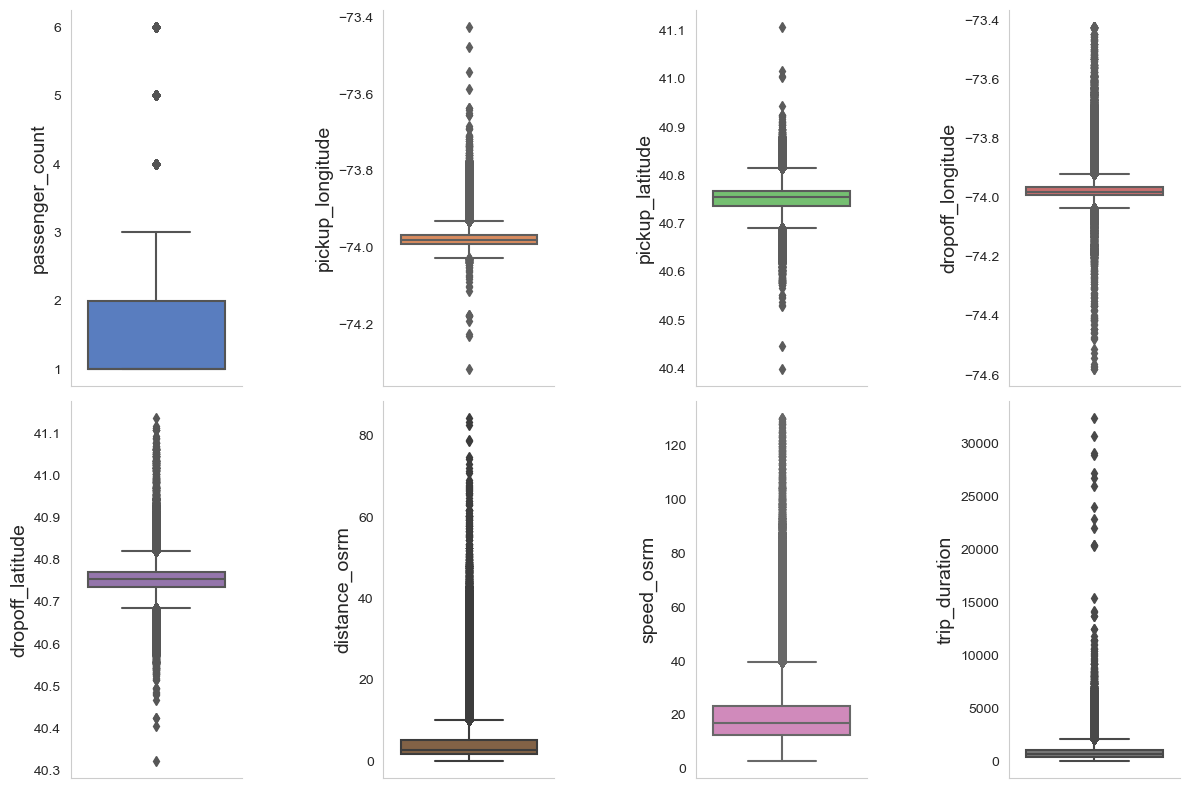

In [53]:
outliers_graph(df, df.columns.to_list())

---

In [54]:
df.to_csv('csv_eda/eda_03.csv', index=False) # index=False to avoid saving the index as a column

In [55]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

# 3. Exploratory Data Analysis (EDA), Data Visualization, and Insights

## 3.1 K-means Clustering

In [2]:
df = pd.read_csv('csv_eda/eda_03.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437135 entries, 0 to 1437134
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1437135 non-null  object 
 1   vendor_id                 1437135 non-null  int64  
 2   passenger_count           1437135 non-null  int64  
 3   pickup_longitude          1437135 non-null  float64
 4   pickup_latitude           1437135 non-null  float64
 5   dropoff_longitude         1437135 non-null  float64
 6   dropoff_latitude          1437135 non-null  float64
 7   store_and_fwd_flag        1437135 non-null  object 
 8   distance_osrm             1437135 non-null  float64
 9   speed_osrm                1437135 non-null  float64
 10  pickup_datetime_month     1437135 non-null  int64  
 11  pickup_datetime_hour      1437135 non-null  int64  
 12  pickup_datetime_weekday   1437135 non-null  object 
 13  pickup_datetime_period    1

I will transform the features `pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, and `dropoff_latitude` into `pickup_cluster` and `dropoff_cluster` using the K-means clustering method. This transformation is necessary to reduce the complexity of the spatial data by grouping nearby locations into distinct clusters, which simplifies the relationship between location and trip duration. 

Clustering helps the model capture regional patterns and spatial dependencies in a more generalized way, reducing the noise from small variations in exact coordinates. Additionally, using clusters can improve the model’s ability to predict trip durations more accurately by focusing on larger geographic areas rather than individual points, ultimately enhancing computational efficiency and performance.

In [4]:
pickup_coords = df[['pickup_longitude', 'pickup_latitude']]
dropoff_coords = df[['dropoff_longitude', 'dropoff_latitude']]

The optimal number of clusters (k) is determined by identifying the point where the inertia (sum of squared distances) begins to decrease at a slower rate, forming an "elbow" in the plot. In this analysis, the elbow is evident at k = 4 for the pickup cluster and k = 3 for the drop-off cluster, indicating where the reduction in inertia starts to level off. By selecting these values for k, I aim to achieve a balanced model that captures sufficient complexity while avoiding overfitting, resulting in a more stable clustering solution.

In [5]:
# %%time
# # running time = 2-3 min
# elbow_method(pickup_coords, title='Elbow Method for Pickup Clusters')

In [6]:
# %%time
# # running time = 2-3 min
# elbow_method(dropoff_coords, title='Elbow Method for Dropoff Clusters')

![elbow_pickup](img/elbow_pickup.png)

![elbow_dropoff](img/elbow_dropoff.png)

In [7]:
optimal_k_pickup = 4
optimal_k_dropoff = 3

In [8]:
kmeans_pickup = KMeans(n_clusters=optimal_k_pickup, random_state=42, n_init=10)
df['pickup_cluster'] = kmeans_pickup.fit_predict(pickup_coords)

In [9]:
kmeans_dropoff = KMeans(n_clusters=optimal_k_dropoff, random_state=42, n_init=10)
df['dropoff_cluster'] = kmeans_dropoff.fit_predict(dropoff_coords)

In [10]:
df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance_osrm,speed_osrm,...,pickup_datetime_hour,pickup_datetime_weekday,pickup_datetime_period,dropoff_datetime_month,dropoff_datetime_hour,dropoff_datetime_weekday,dropoff_datetime_period,trip_duration,pickup_cluster,dropoff_cluster
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,2.1587,17.079824,...,17,Monday,Evening,3,17,Monday,Evening,455,0,1
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,2.5113,13.636018,...,0,Sunday,Early Morning,6,0,Sunday,Early Morning,663,2,0
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,9.9354,16.839661,...,11,Tuesday,Morning,1,12,Tuesday,Afternoon,2124,0,0
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,1.7776,14.916923,...,19,Wednesday,Evening,4,19,Wednesday,Evening,429,2,0
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,1.6064,13.294345,...,13,Saturday,Afternoon,3,13,Saturday,Afternoon,435,0,1


In [11]:
df.shape

(1437135, 21)

In [12]:
sample_size = slovin(df)

Sample size based on Slovin's calculation: 9931


In [13]:
# Pick n random samples
sampled_df_pickup = sample_clusters_random(df, 'pickup_cluster', n=sample_size)
sampled_df_dropoff = sample_clusters_random(df, 'dropoff_cluster', n=sample_size)

In [14]:
sampled_df_pickup.shape, sampled_df_dropoff.shape

((39724, 21), (29793, 21))

In [15]:
# %%time
# # running time = 1-2 min
# plot_cluster_map(sampled_df_pickup, cluster_type='pickup', output_file='html/pickup_clusters_map.html')

In [16]:
# %%time
# # running time = 1-2 min
# plot_cluster_map(sampled_df_dropoff, cluster_type='dropoff', output_file='html/dropoff_clusters_map.html')

In [17]:
# %%time
# # running time = 2-3 min
# plot_cluster(df, 'pickup')

In [18]:
# %%time
# # running time = 2-3 min
# plot_cluster(df, 'dropoff')

By analyzing these clusters, we will identify which cluster has the most significant features influencing taxi trip duration using feature selection techniques and machine learning models.

**New York City Map**

![NYC Map](img/nyc_map_small.png)

**Pickup Cluster (39,724 samples)**

![pickup cluster](img/pickup_cluster.png)

**Pickup Cluster (all data)**

![pickup plot](img/pickup_plot.png)

**Dropoff Cluster (29,793 samples)**

![dropoff cluster](img/dropoff_cluster.png)

**Dropoff Cluster (all data)**

![dropoff plot](img/dropoff_plot.png)

---

In [19]:
df.to_csv('csv_eda/eda_04.csv', index=False) # index=False to avoid saving the index as a column

In [20]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

## 3.2 Pairplot

In [2]:
df = pd.read_csv('csv_eda/eda_04.csv')

In [3]:
cols_to_convert = ['vendor_id', 'pickup_datetime_month', 'pickup_datetime_hour', 
                   'dropoff_datetime_month', 'dropoff_datetime_hour', 'pickup_cluster', 'dropoff_cluster']

In [4]:
df[cols_to_convert] = df[cols_to_convert].astype('object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437135 entries, 0 to 1437134
Data columns (total 21 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1437135 non-null  object 
 1   vendor_id                 1437135 non-null  object 
 2   passenger_count           1437135 non-null  int64  
 3   pickup_longitude          1437135 non-null  float64
 4   pickup_latitude           1437135 non-null  float64
 5   dropoff_longitude         1437135 non-null  float64
 6   dropoff_latitude          1437135 non-null  float64
 7   store_and_fwd_flag        1437135 non-null  object 
 8   distance_osrm             1437135 non-null  float64
 9   speed_osrm                1437135 non-null  float64
 10  pickup_datetime_month     1437135 non-null  object 
 11  pickup_datetime_hour      1437135 non-null  object 
 12  pickup_datetime_weekday   1437135 non-null  object 
 13  pickup_datetime_period    1

Due to the presence of outliers, interpreting the distribution of the variables `trip_duration`, `distance_osrm`, and `speed_osrm` in the pairplot is challenging. To address this, I will apply a transformation function to these columns.

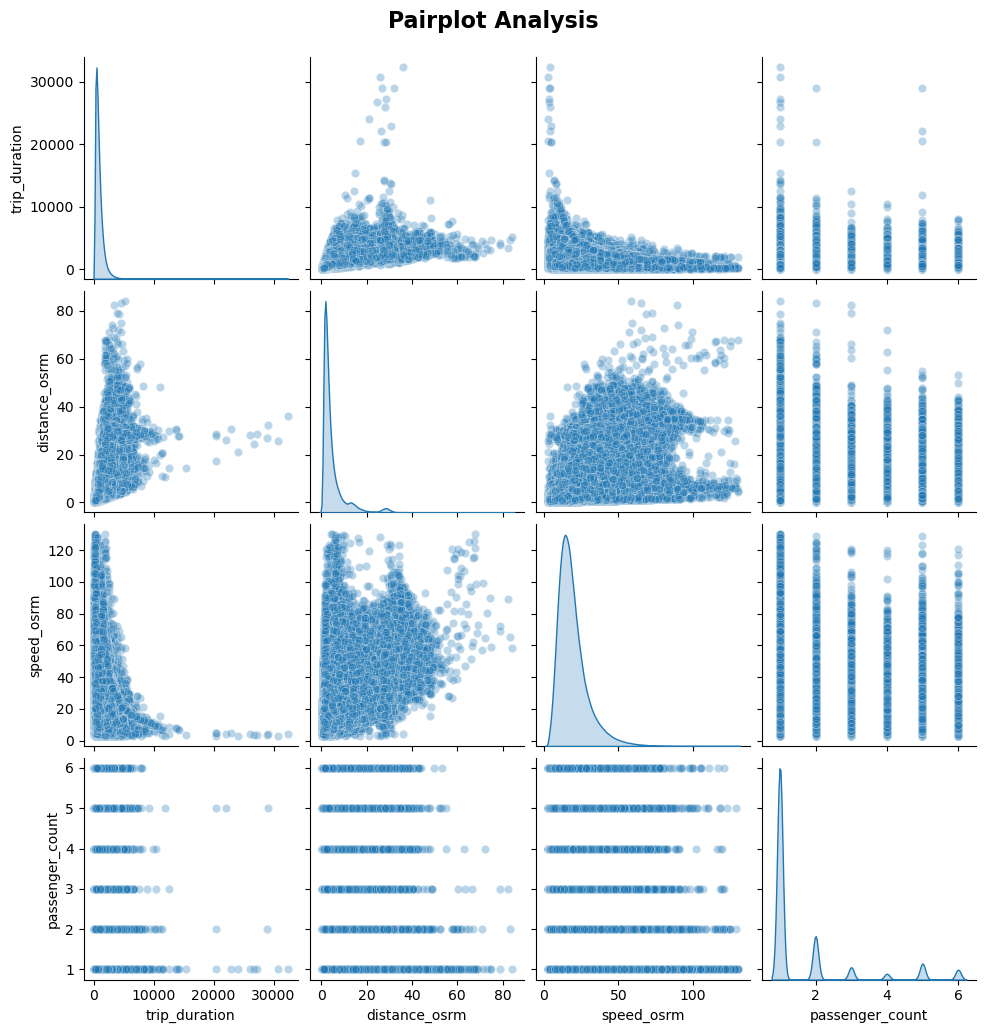

CPU times: total: 2min 45s
Wall time: 2min 45s


In [6]:
%%time
numeric_columns = ['trip_duration', 'distance_osrm', 'speed_osrm', 'passenger_count']

sns.pairplot(df[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.3})

plt.suptitle("Pairplot Analysis", y=1.03, fontsize=16, fontweight='bold')
plt.show()

### 3.2.1 Skewness Transformation

In [7]:
df['Log_trip_duration'] = np.log1p(df['trip_duration'])
df['Log_distance_osrm'] = np.log1p(df['distance_osrm'])
df['Log_speed_osrm'] = np.log1p(df['speed_osrm'])

#### 1. How do the features interact and relate to one another, and what insights can we uncover from their distributions?

**Analysis**

1. **Feature Relationships and Interactions**    
    - **Trip Duration vs. Distance**: From the plot, it's likely that there is a positive correlation between trip duration and distance. Longer trips tend to take more time, which is expected, but we must also consider other factors that may influence this relationship, such as traffic conditions or route taken. Non-linear relationships or outliers might also exist, particularly for trips with unusually long durations for short distances.
    - **Trip Duration vs. Passenger Count**: While passenger count may not have a strong direct relationship with trip duration, for a service that caters to large groups (e.g., taxis or ride-hailing for events), this feature may help with demand forecasting, especially for larger vehicles.
2. **Distribution Insights**
    - **Trip Duration Distribution**: The plot likely reveals a skewed distribution, with most trips falling within a certain time range (e.g., 5-20 minutes), while a few outliers show exceptionally long durations. This suggests that while most taxi rides are of short to moderate duration, there are occasional long trips that may be worth investigating further (e.g., long-distance trips or trips with extreme delays).
    - **Distance Distribution**: A similar skewness may be observed in the distance distribution, with the majority of trips covering relatively short distances. A few long-distance trips may warrant separate treatment, such as identifying special categories for airport rides or long-distance urban trips.

**Recommendation**

1. **Feature Engineering**
    - **Weather Data**: integrating weather data can help in understanding how external factors (e.g., rain or snow) influence trip durations. This could be used to build predictive models or adjust trip time estimates.
2. **Model Development**
    - **Predictive Modeling**: Given the clear relationship between features such as trip duration and distance, a regression model (e.g., Random Forest or Gradient Boosting) can be used to predict trip duration based on various features. The model could also incorporate time-based features to predict variations in trip times depending on the time of day.
3. **Operational Improvements**
    - **Peak Hour Pricing or Dynamic Pricing**: If trips during specific hours (e.g., rush hours) are consistently longer, dynamic pricing could be considered. Offering higher fares during peak periods can help manage demand and encourage customers to opt for off-peak trips.
    - **Route Optimization**: Analyze trip routes to identify inefficiencies or areas where routes consistently take longer than expected. This could lead to recommendations for improving route optimization for drivers or better planning for high-traffic areas.

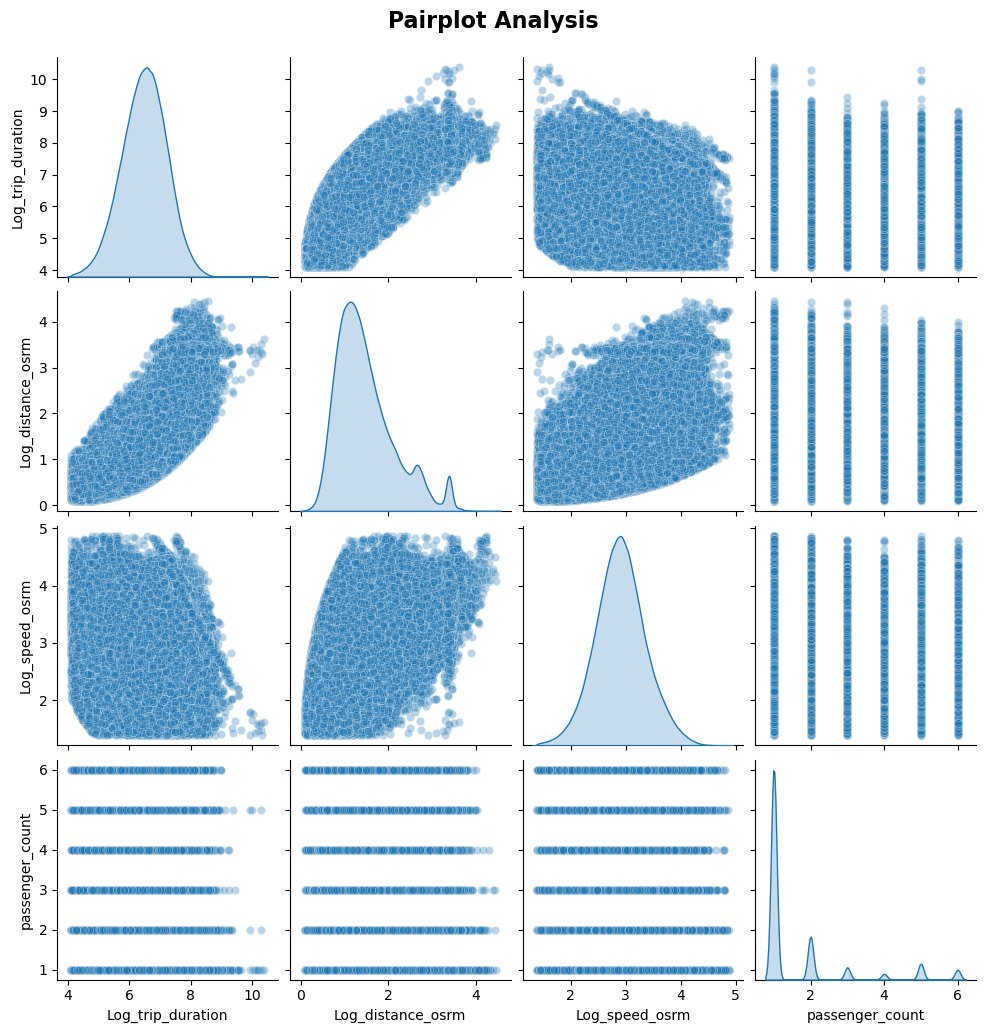

CPU times: total: 2min 30s
Wall time: 2min 31s


In [8]:
%%time
numeric_columns = ['Log_trip_duration', 'Log_distance_osrm', 'Log_speed_osrm', 'passenger_count']

sns.pairplot(df[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.3})

plt.suptitle("Pairplot Analysis", y=1.03, fontsize=16, fontweight='bold')
plt.show()

## 3.3 Correlation Matrix

#### 2. Which features demonstrate the strongest correlations, and which have weaker relationships?

#### A. Original Features

**Analysis**

1. **Strong Correlation**:
    - **Trip Duration and Distance**: The correlation coefficient of 0.77 indicates a strong positive relationship. This suggests that as the distance of the trip increases, the trip duration tends to increase as well. This is expected, as longer trips generally take more time.
2. **Moderate Correlation**:
    - **Speed and Distance**: The correlation coefficient of 0.60 indicates a moderate positive relationship. This suggests that faster speeds tend to correlate with longer distances, which is consistent with the idea that faster trips will cover more distance in the same time frame.
3. **Weak Correlation**:
    - **Other variables**, such as trip duration with speed (correlation of 0.09) and trip duration with passenger count (correlation of 0.01), show weak relationships. The weak correlation implies that changes in these variables do not strongly affect each other.

**VIF Thresholds**
- A VIF value of 1 indicates no correlation between the variable and other variables.
- A VIF between 1 and 5 suggests moderate correlation, which is generally acceptable.
- A VIF above 5 indicates high multicollinearity, which can be problematic.
- A VIF above 10 is typically considered very high, suggesting significant multicollinearity issues.

**Addressing Multicollinearity**
- `speed_osrm`: VIF of 3.76. While the VIF indicates moderate multicollinearity, it is below the critical threshold of 5. Thus, it may not be necessary to remove it from the model unless it becomes a significant concern during further analysis or if it complicates interpretation. It could be worth exploring its interaction with other variables instead of outright removal.
- `distance_osrm`: VIF of 2.65. Similar to speed, this variable has a moderate VIF and can be retained in the model. It plays a crucial role in predicting trip duration, given its strong correlation with the dependent variable.
- `passenger_count`: VIF of 1.94. This variable shows low VIF and can be included without concerns about multicollinearity.

In [9]:
df_1 = df[['trip_duration', 'distance_osrm', 'speed_osrm', 'passenger_count']].copy()

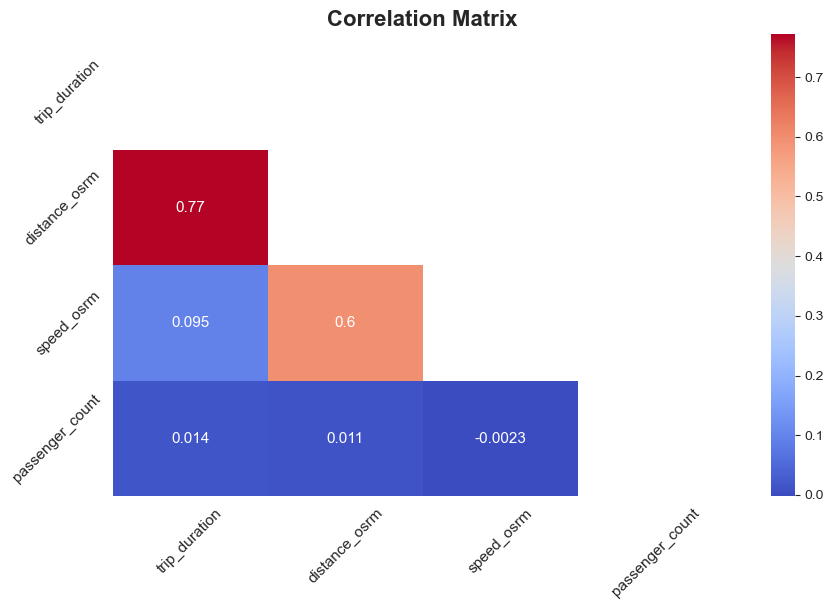

In [10]:
num_corr(df_1)

In [11]:
get_ranked_correlations(df_1)

,Variable 1,Variable 2,Correlation,Rank,Strength
1,distance_osrm,trip_duration,0.771635,1.0,Strong
6,speed_osrm,distance_osrm,0.598322,2.0,Moderate
2,speed_osrm,trip_duration,0.095462,3.0,Weak
3,passenger_count,trip_duration,0.013766,4.0,Weak
7,passenger_count,distance_osrm,0.010664,5.0,Weak
11,passenger_count,speed_osrm,-0.002307,6.0,Weak


In [12]:
calc_vif(df_1, 'trip_duration')

,Features,VIF
0,speed_osrm,3.758176
1,distance_osrm,2.647421
2,passenger_count,1.945742


#### B. Transformed Features

**Analysis**

1. **Strong Correlation**:
    - **Log Trip Duration and Log Distance**: The correlation coefficient of 0.80 indicates a strong positive relationship between the variables. This suggests that as the distance of the trip increases, the trip duration also tends to increase. This is intuitive, as longer trips typically require more time to complete.
2. **Moderate Correlation**:
    - **Log Speed and Log Distance**: The correlation coefficient of 0.55 indicates a moderate positive relationship. This suggests that higher speeds tend to be associated with longer distances, which aligns with the expectation that faster trips will cover more distance within the same time frame.
3. **Weak Correlation**:
    - **Other variables**, such as the log of trip duration with log of speed (correlation of -0.04) and the log of trip duration with passenger count (correlation of 0.01), exhibit weak relationships. These weak correlations suggest that changes in these variables have little to no significant effect on each other.

**VIF Thresholds**
- A VIF value of 1 indicates no correlation between the variable and other variables.
- A VIF between 1 and 5 suggests moderate correlation, which is generally acceptable.
- A VIF above 5 indicates high multicollinearity, which can be problematic.
- A VIF above 10 is typically considered very high, suggesting significant multicollinearity issues.

**Addressing Multicollinearity**
- `Log_speed_osrm`: VIF of 9.83, which is relatively high. A VIF above 5–10 suggests potential multicollinearity issues with that variable. Given that `Log_speed_osrm` is highly correlated with `Log_distance_osrm` (VIF = 8.13), the multicollinearity might be affecting the model's stability and interpretability. It is recommended to drop this feature to mitigate multicollinearity, which can degrade the model's performance and lead to unstable coefficient estimates.

- `Log_distance_osrm`: VIF of 8.13 before `Log_speed_osrm` is dropped. After `Log_speed_osrm` has been removed, the VIF for `Log_distance_osrm` drops to 2.07, which is well within acceptable limits and indicates no significant multicollinearity issues.

- `passenger_count`: VIF of 2.50, which is relatively low and suggests that this variable is not contributing to multicollinearity. After **Log_speed_osrm** has been dropped, the VIF for `passenger_count` also drops to 2.07, confirming that it can be safely included in the model without concerns about multicollinearity.


In [13]:
df_2 = df[['Log_trip_duration', 'Log_distance_osrm', 'Log_speed_osrm', 'passenger_count']].copy()

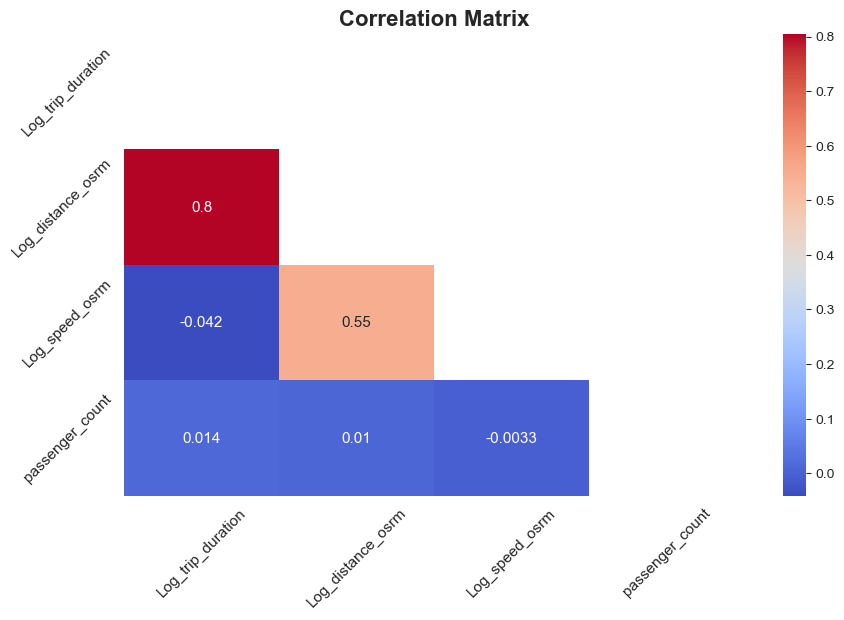

In [14]:
num_corr(df_2)

In [15]:
get_ranked_correlations(df_2)

,Variable 1,Variable 2,Correlation,Rank,Strength
1,Log_distance_osrm,Log_trip_duration,0.804668,1.0,Strong
6,Log_speed_osrm,Log_distance_osrm,0.547168,2.0,Moderate
2,Log_speed_osrm,Log_trip_duration,-0.041563,3.0,Weak
3,passenger_count,Log_trip_duration,0.014394,4.0,Weak
7,passenger_count,Log_distance_osrm,0.010446,5.0,Weak
11,passenger_count,Log_speed_osrm,-0.003303,6.0,Weak


In [16]:
calc_vif(df_2, 'Log_trip_duration')

,Features,VIF
0,Log_speed_osrm,9.830903
1,Log_distance_osrm,8.129190
2,passenger_count,2.506498


In [17]:
df_2.drop('Log_speed_osrm', axis=1, inplace=True)

In [18]:
calc_vif(df_2, 'Log_trip_duration')

,Features,VIF
0,Log_distance_osrm,2.070753
1,passenger_count,2.070753


---

In [19]:
df.to_csv('csv_eda/eda_05.csv', index=False)

In [20]:
stop_here = True

if stop_here:
    raise RuntimeError("Execution stopped manually.")

RuntimeError: Execution stopped manually.

## 3.4 In-Depth Analysis

In [2]:
df_init = pd.read_csv("csv_eda/eda_01.csv")
df_init = to_speed(df_init)

In [3]:
df = pd.read_csv('csv_eda/eda_05.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437135 entries, 0 to 1437134
Data columns (total 24 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        1437135 non-null  object 
 1   vendor_id                 1437135 non-null  int64  
 2   passenger_count           1437135 non-null  int64  
 3   pickup_longitude          1437135 non-null  float64
 4   pickup_latitude           1437135 non-null  float64
 5   dropoff_longitude         1437135 non-null  float64
 6   dropoff_latitude          1437135 non-null  float64
 7   store_and_fwd_flag        1437135 non-null  object 
 8   distance_osrm             1437135 non-null  float64
 9   speed_osrm                1437135 non-null  float64
 10  pickup_datetime_month     1437135 non-null  int64  
 11  pickup_datetime_hour      1437135 non-null  int64  
 12  pickup_datetime_weekday   1437135 non-null  object 
 13  pickup_datetime_period    1

#### 3. Why should outliers be removed from the dataset?

**Analysis**

When working with large datasets, such as the 1,458,643 rows in this project, outlier removal is critical to ensure the quality and accuracy of our analysis. Outliers can introduce noise into the data, leading to skewed insights or erroneous conclusions. In this case, several types of outliers were identified, and each was handled based on its potential impact on the analysis:

1. **Entry with NaN rows (17 entries)**
   - The 17 NaN entries in the `distance_osrm` feature occurred due to errors when the OSRM API attempted to calculate the distance between given latitude and longitude coordinates.
   - Given the large dataset, removing these 17 entries (which represent only 0.0012% of the total data) is a preferable option over imputation. Imputing these values could introduce biased relationships between the `distance_osrm` and other features, particularly because this feature has a high correlation (0.7–0.8) with `trip_duration`. Imputation might distort this relationship and affect downstream analysis.
2. **Outliers in `distance_osrm` (10,663 entries)**
   - For this feature, I define outliers based on an unreasonable distance between pickup and dropoff locations. Distances greater than 100 km (which accounts for locations like the Bronx to Staten Island or JFK Airport) are flagged as outliers. Similarly, distances less than 100 meters are also removed, as such short trips are rarely a legitimate use case for taxis.
   - This threshold ensures we retain realistic trip distances while removing data points that could be a result of API or data entry errors. From the table below, it's important to note that some entries had a distance of zero but non-zero trip durations, which are indicative of potential data issues.
3. **Outliers within the Map Area (180 entries)**
   - To focus on trips within New York City, I restricted the dataset to a 50 km radius around the city center (40.7128, -74.0060). Pickup and dropoff locations outside this radius were considered outliers.
   - This check helps eliminate erroneous data points, such as those with typos in longitude or latitude, and ensures the dataset reflects realistic taxi trips within the operational boundaries of the city.
4. **Outliers in `passenger_count` (60 entries)**
   - Entries with a `passenger_count` of zero were removed, as taxis cannot complete trips without passengers. With only 60 such instances present in the data, this type of entry is highly likely to be an error.
   - From the table below, many of these entries corresponded to extremely long trip durations (e.g., over 24 hours), which is unrealistic for a taxi ride.
5. **Outliers in `speed_osrm` (16,963 entries)**
   - The speed calculated by the OSRM service (based on `distance_osrm` and `trip_duration`) should be between 3 km/h and 130 km/h. Speeds outside this range were flagged as outliers.
   - A minimum speed threshold of 3 km/h accounts for situations where a taxi may be stuck in traffic but still moving. A maximum speed threshold of 130 km/h ensures that excessively fast speeds are excluded, as they are unlikely to be realistic in a taxi scenario.
   - From the table below, outliers were also identified when the `distance_osrm` was zero, which led to corresponding zero-speed entries in the `speed_osrm` feature.
6. **Outliers in `trip_duration` (8,599 entries)**
   - Trips with durations longer than one day (86,400 seconds) or shorter than 60 seconds were considered outliers. A duration of more than 24 hours is highly unlikely for a typical taxi ride, and trips shorter than a minute likely represent errors or anomalies.
   - From the table below, some of these outliers also correspond to cases where `distance_osrm` was nearly zero, indicating potential data issues with either the trip's recorded distance or time.

**Recommendation**

1. **Further Analysis After Cleaning**  
   After removing these outliers, the cleaned dataset should be analyzed again to assess the impact on key business metrics, such as average trip duration, taxi efficiency, and operational coverage. This cleaned dataset can be used to build more robust predictive models, perform more accurate trip duration estimations, and optimize taxi routes for better efficiency.
2. **Monitoring for Future Outliers**  
   It’s important to implement a process to continuously monitor for new outliers in future datasets. Automated checks for unreasonable distances, trip durations, and speeds should be integrated into the data pipeline. This will help maintain the integrity of the dataset and prevent errors from skewing future analyses.
3. **Data Entry Validation**  
   Consider implementing stricter data entry validation procedures to reduce the occurrence of outliers caused by erroneous data. For example, setting realistic thresholds for the `passenger_count` and `trip_duration` fields during data collection or entry could reduce the need for manual outlier removal in the future.

In [5]:
nan_rows_eda = pd.read_csv('csv_eda/nan_rows_eda.csv')
outliers_distance_osrm = pd.read_csv('csv_eda/outliers_distance_osrm.csv')
outliers_map_eda_df_init = pd.read_csv('csv_eda/outliers_map_eda_df_init.csv')
outliers_passenger_count = pd.read_csv('csv_eda/outliers_passenger_count.csv')
outliers_speed_osrm = pd.read_csv('csv_eda/outliers_speed_osrm.csv')
outliers_trip_duration = pd.read_csv('csv_eda/outliers_trip_duration.csv')

In [6]:
print(f"Entry with NaN rows: {len(nan_rows_eda)} entries")
print(f"Outliers in distance_osrm: {len(outliers_distance_osrm)} entries")
print(f"Outliers within the map area: {len(outliers_map_eda_df_init)} entries")
print(f"Outliers in passenger_count: {len(outliers_passenger_count)} entries")
print(f"Outliers in speed_osrm: {len(outliers_speed_osrm)} entries")
print(f"Outliers in trip_duration: {len(outliers_trip_duration)} entries")

Entry with NaN rows: 17 entries
Outliers in distance_osrm: 10663 entries
Outliers within the map area: 180 entries
Outliers in passenger_count: 60 entries
Outliers in speed_osrm: 16963 entries
Outliers in trip_duration: 8599 entries


**Entry with NaN rows**

In [7]:
nan_rows_eda[["id", "distance_osrm", "trip_duration", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]].head(15)

,id,distance_osrm,trip_duration,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,id1795325,NaN,29,-74.040543,40.717087,-74.040550,40.717091
1,id3446262,NaN,19,-74.008095,40.725883,-74.007942,40.725868
2,id1776719,NaN,290,-74.037895,40.731457,-74.033752,40.729279
3,id3479525,NaN,26,-74.036041,40.723789,-74.036186,40.723721
4,id3620479,NaN,119,-74.038231,40.731537,-74.034325,40.731384
5,id3577188,NaN,37,-73.992264,40.756748,-73.992264,40.756790
6,id2391499,NaN,456,-73.882004,40.790432,-73.880730,40.790863
7,id0986672,NaN,27,-74.038902,40.716213,-74.038910,40.716255
8,id3352765,NaN,155,-74.028145,40.740211,-74.028122,40.739845
9,id2714378,NaN,26,-74.036667,40.723934,-74.036674,40.724041


**Outliers in distance_osrm**

In [8]:
outliers_distance_osrm[["id", "distance_osrm", "trip_duration"]].head(15)

,id,distance_osrm,trip_duration
0,id3487442,0.0000,227
1,id0171820,0.0511,189
2,id0924324,0.0000,1109
3,id2954399,0.0014,40
4,id0790613,0.0462,1778
5,id1145809,0.0000,947
6,id3499387,0.0000,580
7,id2386155,0.0257,686
8,id0971699,0.0023,41
9,id2295021,0.0414,4107


**Outliers within the map area**

In [9]:
outliers_map_eda_df_init[["id", "pickup_dist_NYC_center", "dropoff_dist_NYC_center", "distance_osrm", "trip_duration"]].head(15)

,id,pickup_dist_NYC_center,dropoff_dist_NYC_center,distance_osrm,trip_duration
0,id1859156,5.533183,50.597545,46.7853,2534
1,id1092161,20.407204,127.593058,139.0988,7153
2,id3770021,13.453886,54.309272,63.1614,2415
3,id2185383,58.787402,58.786650,0.0000,42
4,id0098463,68.100643,14.291116,81.3889,3190
5,id1607279,56.781268,56.781268,0.0000,261
6,id3300285,20.124712,69.460217,67.6744,3281
7,id2888107,17.907714,53.815345,56.0789,1951
8,id0147490,5.638504,51.771595,57.7816,4803
9,id2000225,13.603050,53.651111,58.0815,2737


**Outliers in passenger_count**

In [10]:
outliers_passenger_count[["id", "passenger_count", "distance_osrm", "trip_duration"]].head(15)

,id,passenger_count,distance_osrm,trip_duration
0,id3917283,0,0.0010,85901
1,id3645383,0,0.0004,4
2,id2840829,0,0.3134,155
3,id3762593,0,17.3312,2251
4,id2154895,0,0.0000,8
5,id0796773,0,0.7856,9
6,id2091096,0,8.4959,2072
7,id0414625,0,0.0001,15
8,id0271506,0,0.1749,41
9,id3176865,0,0.5707,15


**Outliers in speed_osrm**

In [11]:
outliers_speed_osrm[["id", "speed_osrm", "distance_osrm", "trip_duration"]].head(15)

,id,speed_osrm,distance_osrm,trip_duration
0,id3487442,0.000000,0.0000,227
1,id0171820,0.973333,0.0511,189
2,id0924324,0.000000,0.0000,1109
3,id2954399,0.126000,0.0014,40
4,id0790613,0.093543,0.0462,1778
5,id1145809,0.000000,0.0000,947
6,id3307903,0.139112,3.2689,84594
7,id0131920,1.633134,0.8642,1905
8,id3499387,0.000000,0.0000,580
9,id3263580,3501.720000,2.9181,3


**Outliers in trip_duration**

In [12]:
outliers_trip_duration[["id", "trip_duration", "distance_osrm"]].head(15)

,id,trip_duration,distance_osrm
0,id1510700,57,0.4547
1,id2954399,40,0.0014
2,id3263580,3,2.9181
3,id2730154,58,0.3839
4,id0729156,2,4.7617
5,id0971699,41,0.0023
6,id0953001,40,0.4635
7,id2456838,7,0.1526
8,id2281954,49,0.5038
9,id2843664,47,0.1322


#### 4. What are the maximum, minimum, mean, count, and sum of trip durations from 2016?

**Data Observation**
- Maximum trip duration (before outlier removal) = 3,526,282 seconds = 40 days
- Maximum trip duration (after outlier removal) = 32,338 seconds = 8.98 hours
- Minimum trip duration (before outlier removal)  = 1 second
- Minimum trip duration (after outlier removal)  = 60 seconds
- Mean trip duration (before outlier removal) = 959 seconds = 15.9 minutes
- Mean trip duration (after outlier removal) = 840 seconds = 14.0 minutes
- Total number of trips (Count) before outlier removal = 1,458,644 orders
- Total number of trips (Count) (after outlier removal) = 1,437,135 orders
- Total trip duration (Sum) (before outlier removal) = 388,766 hours
- Total trip duration (Sum) (after outlier removal) = 335,517 hours

**Analysis**
- The maximum trip duration drastically reduced from 40 days to 8.98 hours after outlier removal. This suggests that there were extreme values in the data that were likely errors or anomalies, making the trip duration unreasonable for typical taxi trips in a city.
- The minimum trip duration increased from 1 second to 60 seconds after outlier removal. A trip duration of 1 second is not feasible for a real-world scenario, and removing such extreme outliers helps in making the data more realistic.
- The mean trip duration also slightly reduced from 15.9 minutes to 14.0 minutes, indicating that a small portion of the trips had unusually long durations that skewed the average before outlier removal.
- A total of 1,437,135 trips were analyzed after outlier removal, contributing to a total trip duration of 335,517 hours. This reduction in both the number of trips and total duration suggests that a significant portion of the data was affected by outliers, which were likely distorting the overall metrics. Nonetheless, the remaining dataset still offers a robust sample for analysis, ensuring that the trends and patterns observed are meaningful and reliable.

**Recommendation**
- Establish a system for regularly monitoring and flagging outliers in the dataset. Trips with extremely long or short durations (such as 40 days or 1 second) should be flagged for further review to ensure data quality and accuracy.
- The presence of extreme outliers indicates potential issues with data collection processes (e.g., errors in trip start or end times). Implementing stricter validation rules at the point of data entry can help prevent these errors from occurring.
- With the average trip duration being 14.0 minutes after cleaning, the company could explore route optimization strategies to reduce trip time further. This would improve customer satisfaction and reduce operational costs.

In [13]:
print("Before Outlier Removal:")
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(df_init['trip_duration'].describe())

Before Outlier Removal:
count   1458644
mean        959
std        5237
min           1
25%         397
50%         662
75%        1075
max     3526282
Name: trip_duration, dtype: float64


In [14]:
print("After Outlier Removal:")
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(df['trip_duration'].describe())

After Outlier Removal:
count   1437135
mean        840
std         658
min          60
25%         401
50%         665
75%        1075
max       32338
Name: trip_duration, dtype: float64


In [15]:
print("Before Outlier Removal:")
df_init['trip_duration'].sum() / 3600

Before Outlier Removal:


388766.0130555556

In [16]:
print("After Outlier Removal:")
df['trip_duration'].sum() / 3600

After Outlier Removal:


335516.9872222222

#### 5. What are the maximum, minimum, mean, and sum of distances from 2016?

**Data Observation**
- Maximum distance (before outlier removal) = 765.644 km
- Maximum distance (after outlier removal) = 84.186 km
- Minimum distance (before outlier removal) = 0 km
- Minimum distance (after outlier removal) = 0.101 km
- Mean distance (before outlier removal) = 4.619 km
- Mean distance (after outlier removal) = 4.667 km
- Total distance traveled (Sum) (before outlier removal) = 6,737,715 km
- Total distance traveled (Sum) (after outlier removal) = 6,706,591 km

**Analysis**
- The maximum observed distance after removing outliers (84.186 km) falls within a much more realistic range, especially when considering the typical geographic limits of New York City. This new maximum distance aligns well with expected trip distances, even to far reaches of the city, such as from the Bronx to Staten Island or from Manhattan to JFK Airport, which generally span up to 50-60 km. The initial maximum distance of 765.644 km was clearly an outlier, likely due to data entry errors or extraordinary trips outside usual city limits. By setting the threshold at 100 km, we've ensured a more representative dataset that accurately reflects typical taxi trips within New York City.
- The minimum distance changed from 0 km to 0.101 km. This is likely due to the removal of trips that erroneously recorded zero distance, possibly due to data entry errors or trips that were canceled. The new minimum is more realistic, representing very short trips.
- The mean distance increased slightly from 4.619 km to 4.667 km after outlier removal. This reflects a more accurate representation of typical taxi trip lengths after removing extreme values that were skewing the original calculation.
- The total distance traveled after outlier removal is 6,706,591 km. This small reduction from the initial total of 6,737,715 km suggests that the outliers had a minimal impact on the overall distance calculation, as the majority of the data remains unchanged. However, removing those extreme values ensures a more accurate reflection of the typical trip distances, providing a strong foundation for analyzing trip frequency and demand patterns within the city.

**Recommendation**
- Implement automated outlier detection systems to continuously monitor and filter out unrealistic trip distances, such as the original maximum of 765.644 km. This can improve the accuracy of distance metrics and provide more actionable insights for stakeholders.
- Investigate trips with minimal distances, especially those under 100 meters, to ensure data accuracy. Consider flagging or excluding trips that might be erroneous or result from system errors, such as trips recorded as 0 km due to incorrect GPS readings or cancellations.
- Perform a more in-depth analysis of trips exceeding 100 km to better understand their frequency, origins, and destinations. These may represent rides to airports or neighboring cities, which could be opportunities for targeted promotions or services.

In [17]:
print("Before Outlier Removal:")
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df_init['distance_osrm'].describe())

Before Outlier Removal:
count   1458627.000
mean          4.619
std           5.625
min           0.000
25%           1.666
50%           2.758
75%           5.030
max         765.644
Name: distance_osrm, dtype: float64


In [18]:
print("After Outlier Removal:")
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df['distance_osrm'].describe())

After Outlier Removal:
count   1437135.000
mean          4.667
std           5.432
min           0.101
25%           1.701
50%           2.792
75%           5.081
max          84.186
Name: distance_osrm, dtype: float64


In [19]:
print("Before Outlier Removal:")
df_init['distance_osrm'].sum()

Before Outlier Removal:


6737715.8227999965

In [20]:
print("After Outlier Removal:")
df['distance_osrm'].sum()

After Outlier Removal:


6706469.685699998

#### 6. What are the maximum, minimum, and mean of taxi speeds from 2016?

**Data Observation**
- Maximum speed (before outlier removal) = 12,246 km/h
- Maximum speed (after outlier removal) = 129.97 km/h
- Minimum speed (before outlier removal) = 0 km/h
- Minimum speed (after outlier removal) = 3 km/h
- Mean speed (before outlier removal) = 19.477 km/h
- Mean speed (after outlier removal) = 19.238 km/h

**Analysis**
- The maximum speed before outlier removal was 12,246 km/h, which is clearly an unrealistic value for any vehicle, let alone a taxi in an urban environment. After outlier removal, the maximum speed is reduced to 129.97 km/h. Although 129.97 km/h is still high, it is more plausible and could be due to a taxi speeding on a highway or expressway, especially during off-peak hours.
- The minimum speed before outlier removal was 0 km/h, which may represent instances where the taxi was stationary for an extended period (e.g., at traffic lights or due to congestion). After outlier removal, the minimum speed increased to 3 km/h, indicating that trips with no meaningful movement have been filtered out. A minimum speed of 3 km/h is reasonable for urban traffic conditions, especially during peak hours or in congested areas.
- The mean speed decreased slightly from 19.477 km/h to 19.238 km/h after removing outliers. This suggests that the presence of extreme values (both high and low speeds) had a small but noticeable effect on the overall distribution. The mean speed of around 19 km/h is typical for taxis in New York City, where traffic, stop-and-go patterns, and speed limits influence overall travel speeds.

**Recommendation**
- The mean speed of 19.238 km/h is consistent with urban traffic conditions. However, strategies such as optimizing routes through real-time traffic data, avoiding known congestion zones, or promoting off-peak travel can help improve average speeds. This can reduce overall trip times and improve fuel efficiency.
- Examining speed variations during different times of day or week can help identify patterns, such as peak-hour traffic bottlenecks or smoother traffic flows at night. This can inform decisions about driver scheduling, route optimization, and pricing strategies for high-demand periods.

In [21]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df_init['speed_osrm'].describe())

count   1458627.000
mean         19.477
std          31.748
min           0.000
25%          12.361
50%          16.986
75%          23.253
max       12246.891
Name: speed_osrm, dtype: float64


In [22]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df['speed_osrm'].describe())

count   1437135.000
mean         19.238
std          10.032
min           3.000
25%          12.514
50%          17.076
75%          23.298
max         129.966
Name: speed_osrm, dtype: float64


#### 7. Do trip duration and distance have a linear relationship, such as v = s/t (where t is proportional to s)?

**Analysis**
- The scatter plot reveals a significant concentration of trips in the lower range of both distance (0-40 km) and duration (0-2 hours). This suggests that most taxi trips are relatively short both in terms of distance and time. As the distance increases, however, the density of data points begins to decrease, indicating fewer long-distance trips.
- A key observation is that the plot shows a more distinct but still non-linear relationship between distance and duration, with some clusters showing a clearer trend where longer distances tend to correlate with longer durations. However, this pattern is not perfectly linear. For instance, while most trips under 40 km show durations between 0-2 hours, there is significant variation even for these distances, and longer distances (e.g., 60+ km) display erratic durations that deviate from a straight line.
- A handful of outliers continue to appear, particularly for distances between 10 and 40 km, where trips can extend up to 4 hours. These outliers likely result from non-distance-related factors, such as traffic congestion, multiple stops, or long waiting times. It's also possible that some trips have unusual routing or detours that extend their duration despite relatively short distances.
- The plot does not fully support the hypothesis of a linear relationship between trip duration and distance (v = s/t). If a strictly linear relationship existed, the data points would follow a much tighter pattern along a straight line. Instead, there are large deviations from this expected pattern, indicating other variables influencing the duration, such as traffic conditions, route complexity, or driver behavior.

**Recommendation**
- To provide more accurate trip duration estimates, integrate real-time traffic and weather data into the trip duration prediction model. These factors appear to have a considerable impact on trip duration and should be considered for improved forecasting.
- Since some trips with similar distances have widely varying durations, consider analyzing driver efficiency patterns. By identifying and encouraging practices associated with faster trips (e.g., optimized route selection), the company can improve overall service speed and reliability.
- The data contains several outliers where trip durations are exceptionally long for short distances. These trips should be investigated further to understand their causes (e.g., excessive waiting times, unscheduled stops, or potential issues with the trip management system). Addressing these could lead to more predictable and efficient service.

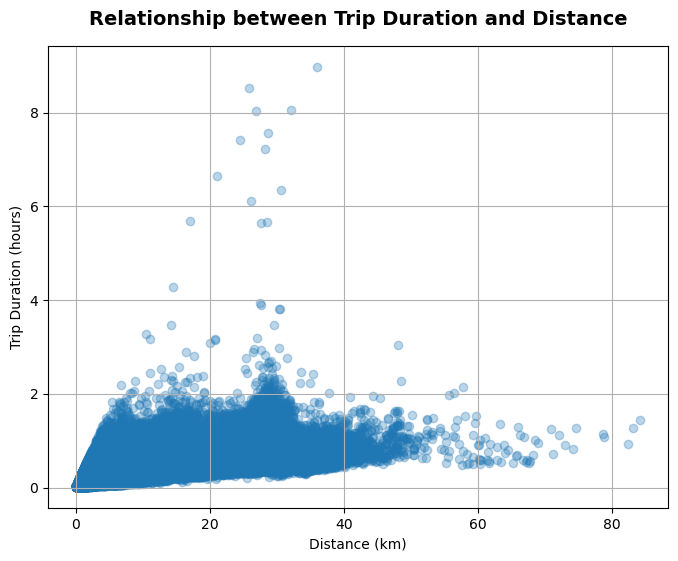

In [23]:
plot_trip_duration_vs_distance(df)

#### 8. Which vendor had the largest number of trip duration in 2016?

**Analysis**
- Vendor 2, because they had 180,241 hours of total trip duration, while Vendor 1 only had 155,276 hours of total trip duration.

**Recommendation**
- Given the largest number of trip durations associated with Vendor 2, it may be beneficial for the company to further investigate the factors contributing to this difference. Analyzing aspects such as route efficiency, driver behavior, and customer preferences could provide insights into optimizing trip durations. Additionally, consider exploring partnerships with Vendor 2 for improved service offerings, or assess whether Vendor 1 can implement strategies to enhance their trip durations.

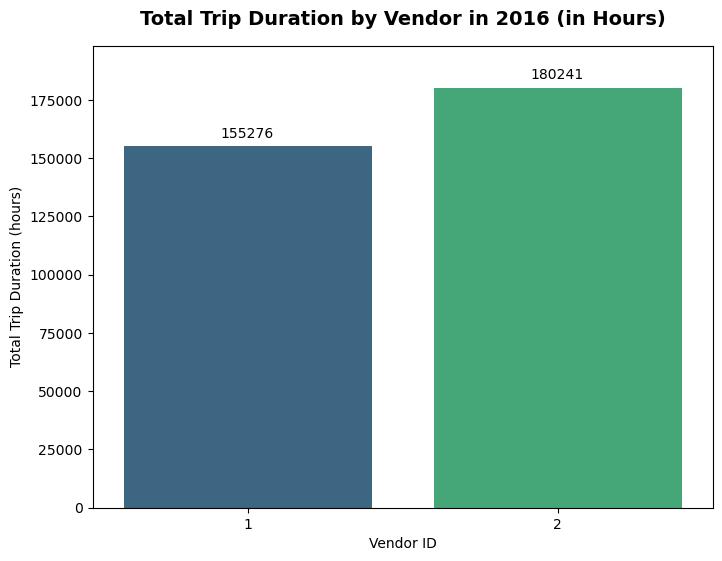

In [24]:
plot_vendor_trip_duration(df)

#### 9. Which vendor had the larger total distance in 2016?

**Analysis**
- Vendor 2 outperformed Vendor 1 in terms of total distance traveled, covering 3,621,115 kilometers, while Vendor 1 covered 3,085,354 kilometers. This gap suggests that Vendor 2 managed a higher volume of trips or covered longer distances per trip during the year.
- Vendor 2's total distance is approximately 17.38% greater than that of Vendor 1.

**Recommendation**
- Since Vendor 2 has a higher total distance, it's crucial to investigate the factors contributing to this difference. Consider evaluating their operational efficiency, driver performance, and fleet size. Understanding their processes could offer insights into improving Vendor 1’s performance.
- While Vendor 2 covers more distance, it is important to check whether this leads to proportionally higher revenues or if it introduces higher operational costs. Profitability should not be compromised by merely increasing distance.

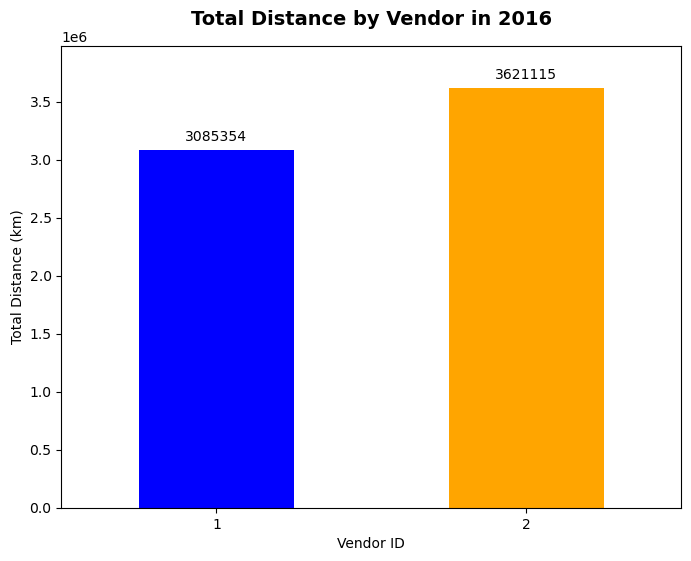

In [25]:
plot_total_distance_by_vendor(df)

#### 10. What are the average taxi speeds for each vendor in 2016?

**Analysis**
- Vendor 2 demonstrates a slightly higher average speed (19.27 km/h) compared to Vendor 1 (19.20 km/h). This difference, though small, could indicate minor variations in factors like traffic conditions, driver behavior, route optimizations, or geographical coverage.
- The combined average speed for both vendors is 19.24 km/h, which aligns closely with both individual vendors' speeds, showing a general consistency in operational performance.

**Recommendation**
- Comparing the average speed of 19.24 km/h with industry standards or peer companies could help determine whether this performance is competitive. If it is below the industry average, consider strategies to improve speed without compromising service quality.
- Ensure that increasing speeds does not compromise passenger safety or comfort. Monitoring safety metrics alongside speed improvements is crucial to maintaining a positive customer experience.

In [26]:
avg_speed_all_vendors = df['speed_osrm'].mean()
avg_speed_all_vendors = pd.DataFrame({'Average Speed (km/h) (All Vendors) ': [avg_speed_all_vendors]})
avg_speed_all_vendors

,Average Speed (km/h) (All Vendors)
0,19.238288


In [27]:
average_speeds = df.groupby('vendor_id')['speed_osrm'].mean().reset_index()
average_speeds.columns = ['Vendor ID', 'Average Speed (km/h)']
average_speeds

,Vendor ID,Average Speed (km/h)
0,1,19.198770
1,2,19.272722


#### 11. How many taxi trips were made by each vendor in 2016?

**Analysis**
- Number of trips = 1,437,135
- Number of Taxi trips per Vendor:
    - Vendor 1: 669,174
    - Vendor 2: 767,961

**Recommendation**
- Vendor 2 is also leading in the number of trips taken, suggesting a higher demand or possibly better availability. Understanding the reasons for Vendor 2's higher trip volume could provide insights into effective strategies that can be implemented across both vendors.

In [28]:
total_trips_all_vendors = df['id'].count()
total_trips_all_vendors = pd.DataFrame({'Total Trips (All Vendors)': [total_trips_all_vendors]})
total_trips_all_vendors

,Total Trips (All Vendors)
0,1437135


In [29]:
taxi_trips = df.groupby('vendor_id')['id'].count().reset_index()
taxi_trips.columns = ['Vendor ID', 'Total Trips']
taxi_trips

,Vendor ID,Total Trips
0,1,669174
1,2,767961


#### 12. How many taxi trips were there for any trip that was either ordered (pickup) or completed (drop-off) within a 24-hour period in 2016?

**Analysis**
- The data reveals that the highest number of taxi trips were ordered (pickup) at 18:00 (89,387 trips) and completed (dropoff) at 19:00 (92,201 trips). This suggests that the worst traffic congestion likely occurs between 18:00 and 19:00. After 19:00, the number of trips begins to gradually decrease, though it remains relatively high until around 22:00. This trend reflects typical evening rush hour patterns, where people are heading home or to evening activities, resulting in increased demand for taxis.
- The fewest taxi trips were ordered (pickup) at 05:00 (14,687 trips) and completed (dropoff) around the same time with 13,740 trips. This suggests that during early morning hours, particularly between 01:00 and 06:00, the traffic is at its lowest, likely due to fewer commuters and lower demand for transportation services. After 06:00, there is a noticeable increase in the number of trips, which steadily rises until the evening peak at 19:00.

**Recommendation**
- To accommodate the higher demand between 18:00 and 22:00, we should consider deploying more taxis during this time. This could reduce wait times for customers and enhance service satisfaction.
- Implementing higher fares during peak traffic hours can help manage the increased demand and ensure a sufficient supply of taxis. By raising the fare during high-demand periods (like 18:00 to 22:00), the company can incentivize more drivers to be on the road and offset the impact of longer trip durations caused by traffic congestion.
- Encourage more taxi usage during off-peak hours through promotions or discounts. For example, offering early morning commuters or late-night travelers discounted fares might help boost ridership during quieter periods.

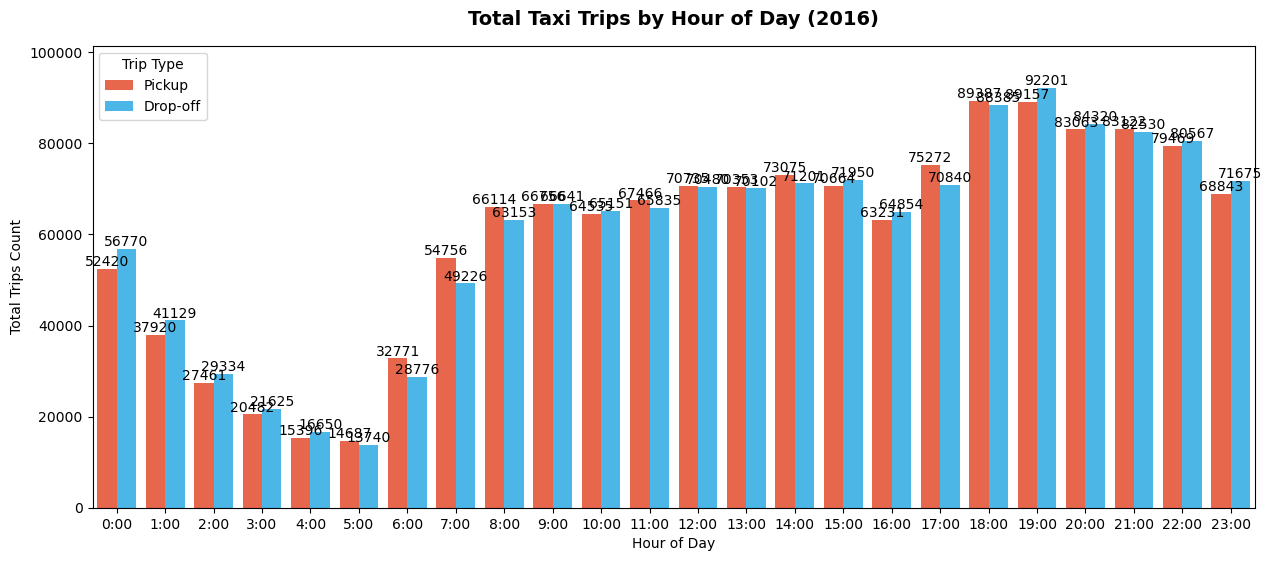

In [30]:
plot_trip_counts_by_hour(df)

In [31]:
pickup_count = df.groupby(df['pickup_datetime_hour'])['id'].count().reset_index()
pickup_count.rename(columns={'id': 'pickup_count', 'pickup_datetime_hour': 'hour'}, inplace=True)

dropoff_count = df.groupby(df['dropoff_datetime_hour'])['id'].count().reset_index()
dropoff_count.rename(columns={'id': 'dropoff_count', 'dropoff_datetime_hour': 'hour'}, inplace=True)

hourly_counts = pd.concat([pickup_count.set_index('hour'), dropoff_count.set_index('hour')], axis=1).reset_index()
hourly_counts

,hour,pickup_count,dropoff_count
0,0,52420,56770
1,1,37920,41129
2,2,27461,29334
3,3,20482,21625
4,4,15396,16650
5,5,14687,13740
6,6,32771,28776
7,7,54756,49226
8,8,66114,63153
9,9,66756,66641


#### 13. How many taxi trips were there for any trip that was either ordered (pickup) or completed (drop-off) during different parts of the day in 2016?

**Analysis**
- The highest number of taxi trips were ordered (pickup) during the morning hours between 06:00 and 12:00, totaling 352,398 pickups, with 338,782 drop-offs. This shows a peak in demand during morning commuting hours, likely due to people heading to work or appointments.
- The lowest number of taxi trips were ordered (pickup) during the early morning hours between 00:00 and 06:00, with 168,366 pickups and 179,248 drop-offs. The higher number of drop-offs suggests that many trips started before midnight or that early morning trips are more for getting passengers home after late-night activities.
- The afternoon hours (12:00 to 16:00) show a slight drop in demand compared to the morning, with 284,827 pickups and 283,733 drop-offs. Demand during this period is stable but less intense than in other parts of the day.
- The evening (16:00 to 20:00) and night (20:00 to 24:00) hours have almost equal taxi activity. Evening pickups totaled 317,047 with 316,280 drop-offs, while night pickups totaled 314,497 with 319,092 drop-offs. This consistency across evening and night suggests sustained demand after work and into the later hours, possibly for social or leisure activities.

**Recommendation**
- Increase taxi availability during the morning hours (06:00 - 12:00) to accommodate the highest demand. Ensuring more drivers are available during this time will help reduce wait times and improve service.
- Maintain steady availability of taxis throughout the evening (16:00 - 20:00) and night (20:00 - 24:00), as demand remains consistently high. Focus on key areas such as business districts and entertainment zones to meet the steady demand for both pickups and drop-offs.
- Reduce fleet deployment during the early morning hours (00:00 - 06:00) as demand is significantly lower, but maintain a presence to cover essential trips, such as late-night returns or airport runs.
- Optimize driver shifts in the afternoon (12:00 - 16:00) when demand is stable but not as high. Implement flexible scheduling to ensure a balanced fleet throughout the day while preparing for peak periods in the evening and night.

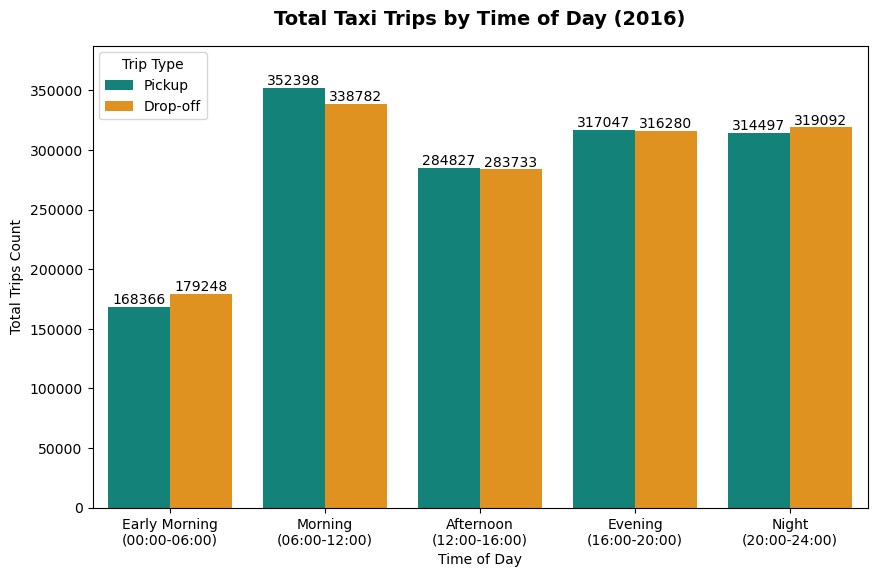

In [32]:
plot_taxi_trips_by_time_of_day(df)

#### 14. How many taxi trips were there on weekdays in 2016?

**Analysis**
- The demand for taxi trips gradually increases from Monday (184,765 trips) to Friday (220,174 trips), indicating that the demand builds up throughout the workweek, reaching its peak on Friday. This suggests that as the week progresses, people engage in more activities that require transportation, such as business meetings, social events, or weekend preparation.
- After Friday's peak, the number of trips slightly decreases on Saturday (217,639 trips), though demand remains high over the weekend.
- A more significant decrease is observed on Sunday (192,334 trips), as the weekend comes to an end and people likely prepare for the upcoming workweek.
- The cycle restarts on Monday, with the lowest demand of the week, and the pattern repeats itself.

**Recommendation**

- Monitor the trend of increasing demand from Monday to Saturday and ensure that the number of available taxis scales up gradually throughout the week. This can be achieved by scheduling additional drivers or adjusting vehicle dispatch based on demand forecasts.
- The decrease in demand after Friday suggests that while taxi services are still needed on the weekend, there is slightly less pressure compared to Friday. Use this insight to balance taxi availability accordingly: maintain high availability on Saturdays, but slightly reduce the fleet for Sunday, as demand drops significantly before the new workweek begins.

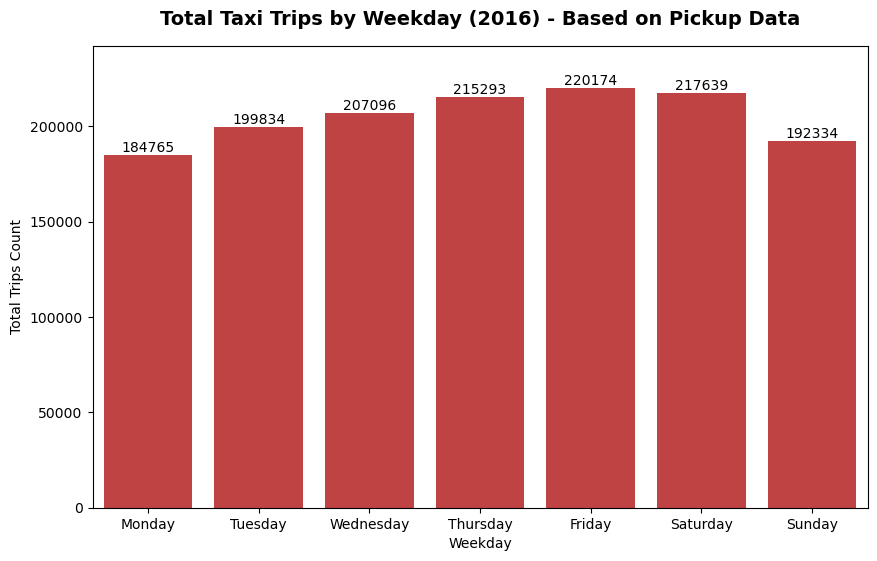

In [33]:
plot_pickup_by_weekday(df)

#### 15. How many taxi trips were there each month in 2016?

**Analysis**
- The highest number of taxi trips occurred in March (252,620 trips), followed by April (247,933 trips). The lowest number of trips happened in January (226,293 trips).
- There is a steady increase in the number of taxi trips from January to March, followed by a gradual decline from April to June.
- From the dataframe, there are 0 pickups in July, which means no new rides started in July based on the dataset.
- From the dataframe, there are 114 dropoffs in July, meaning that these rides began in late June and ended in July.

**Recommendation**
- Since there is a clear increase in demand from January to March, implementing targeted marketing campaigns in the early months of the year can help capture more customers and boost revenue.
- Given the fluctuation in taxi trip demand, consider implementing dynamic pricing to maximize profits during peak months like March. This can help capitalize on increased demand and manage supply more efficiently.
- Conduct further analysis to understand why demand peaks in March and decreases afterward. Understanding the drivers behind these trends (e.g., weather, events, or holidays) will help in predicting future demand and developing proactive strategies.

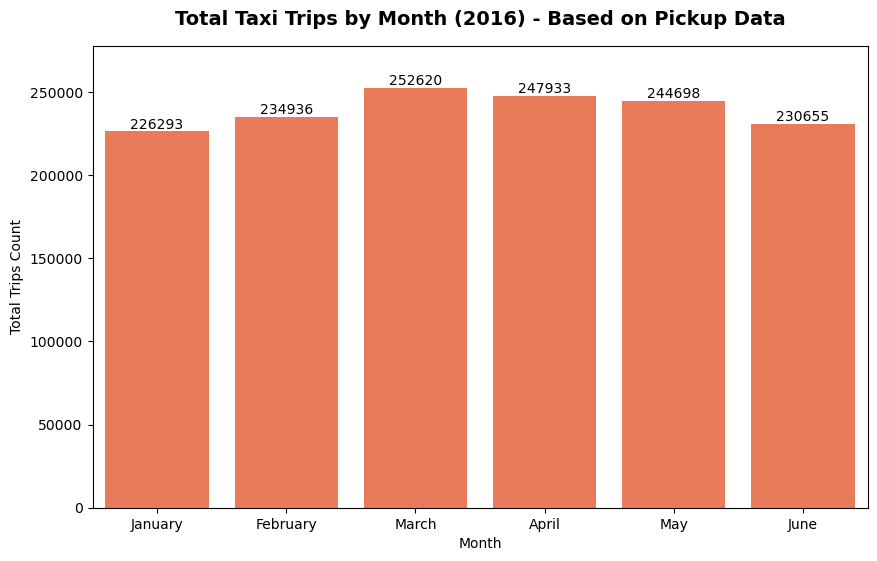

In [34]:
plot_pickup_by_month(df)

In [35]:
pickup_july = df[df["pickup_datetime_month"]==7]["pickup_datetime_month"].count()
print(pickup_july)

0


In [36]:
dropoff_july = df[df["dropoff_datetime_month"]==7]["dropoff_datetime_month"].count()
print(dropoff_july)

114


#### 16. What was the average distance covered by taxis for trips that were either ordered (pickup) or completed (drop-off) within a 24-hour period in 2016?

**Analysis**
- The longest average distances for both pickup (7.55 km) and drop-off (7.15 km) occur at 05:00. The second-highest average trip distance happens at 04:00, with 6.70 km for pickups and 6.38 km for drop-offs.
- The shortest distances are observed between 08:00 and 12:00, where the average distance for pickups and drop-offs hovers around 3.9-4.2 km. For instance, at 09:00, the average pickup distance is 3.98 km, and the drop-off distance is 4.13 km.
- Early morning hours between 00:00 and 06:00 exhibit relatively long trips, especially between 04:00 and 05:00, where the average distance stays between 6.38 km and 7.55 km.
- Nighttime trips from 19:00 to 23:00 also tend to be relatively long trips. There is a gradual increase in distance, ranging from 4.21 km to 5.40 km for both pickup and drop-off locations, indicating a consistent demand during these hours.

**Recommendation**
- The highest average trip distances occur during early morning trips (04:00 - 05:00), indicating a surge in longer-distance travel. The company could optimize fleet allocation and driver availability during these hours to maximize service efficiency and revenue. Marketing campaigns could target customers who frequently book long-distance rides during this period, potentially promoting special fares for extended trips.
- Between 08:00 and 12:00, there is a lower average trip distance, indicating shorter trips. The company can explore ways to increase trip frequency or optimize pricing for short-distance travel to boost profitability. Offering promotions for quick rides or bundling services during these hours could attract more customers for shorter trips.

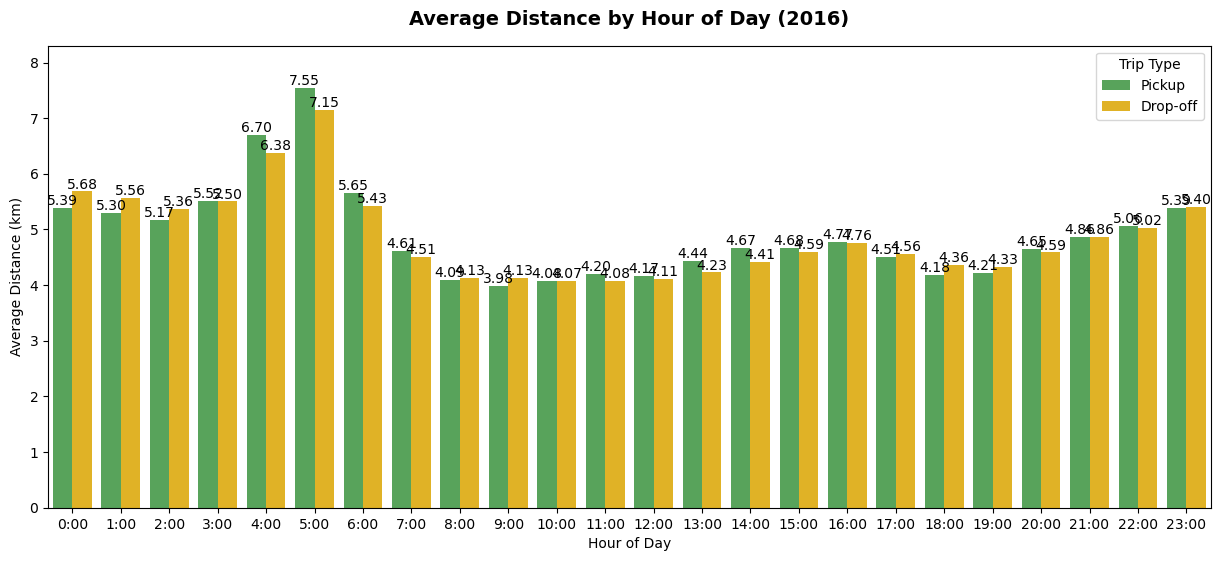

In [37]:
plot_average_distance_covered_by_hour(df)

In [38]:
pickup_distances = df.groupby('pickup_datetime_hour')['distance_osrm'].mean().reset_index()
pickup_distances.rename(columns={'distance_osrm': 'pickup distance', 'pickup_datetime_hour': 'hour'}, inplace=True)

dropoff_distances = df.groupby('dropoff_datetime_hour')['distance_osrm'].mean().reset_index()
dropoff_distances.rename(columns={'distance_osrm': 'dropoff distance', 'dropoff_datetime_hour': 'hour'}, inplace=True)

hourly_distances = pd.concat([pickup_distances.set_index('hour'), dropoff_distances.set_index('hour')], axis=1).reset_index().round(2)
hourly_distances

,hour,pickup distance,dropoff distance
0,0,5.39,5.68
1,1,5.30,5.56
2,2,5.17,5.36
3,3,5.52,5.50
4,4,6.70,6.38
5,5,7.55,7.15
6,6,5.65,5.43
7,7,4.61,4.51
8,8,4.09,4.13
9,9,3.98,4.13


#### 17. What was the average speed of taxis within a 24-hour period in 2016?

**Analysis**
- Speeds are higher in the early morning hours (00:00 - 06:00), especially between 03:00 and 06:00. The highest average speed for both pickup and drop-off trips occurs at 05:00, with a speed of 33.19 km/h for pickups and 32.88 km/h for drop-offs.
- Between 00:00 and 02:00, the speeds remain relatively high, ranging from 23.51 km/h to 25.05 km/h, indicating low traffic during these hours.
- Speeds begin to decline sharply starting at 08:00, with a notable decrease to around 17.31 km/h for pickups and 17.86 km/h for drop-offs, highlighting the impact of morning rush hour traffic.
- The taxi speeds remain relatively low between 08:00 and 19:00, fluctuating between 16.17 km/h and 18.10 km/h. This suggests moderate traffic conditions during this period. The speeds stay stable, with minor differences between pickup and drop-off speeds.
- There is a noticeable increase in speed starting from 19:00, where the average speed rises from 17.61 km/h to 22.51 km/h by 23:00. The improvement in speeds toward the end of the day indicates less congestion during nighttime hours.

**Recommendation**
- Based on the speed trends, taxi services should increase the number of available drivers during low-speed periods, particularly between 08:00 and 19:00. These hours experience lower average speeds, indicating traffic congestion and potentially higher demand for taxis.
- The data suggest that traffic congestion is a significant factor affecting taxi trip durations, particularly between 08:00 and 19:00. Collaborating with local traffic authorities to identify congestion hotspots and optimize routes could help improve taxi trip durations.

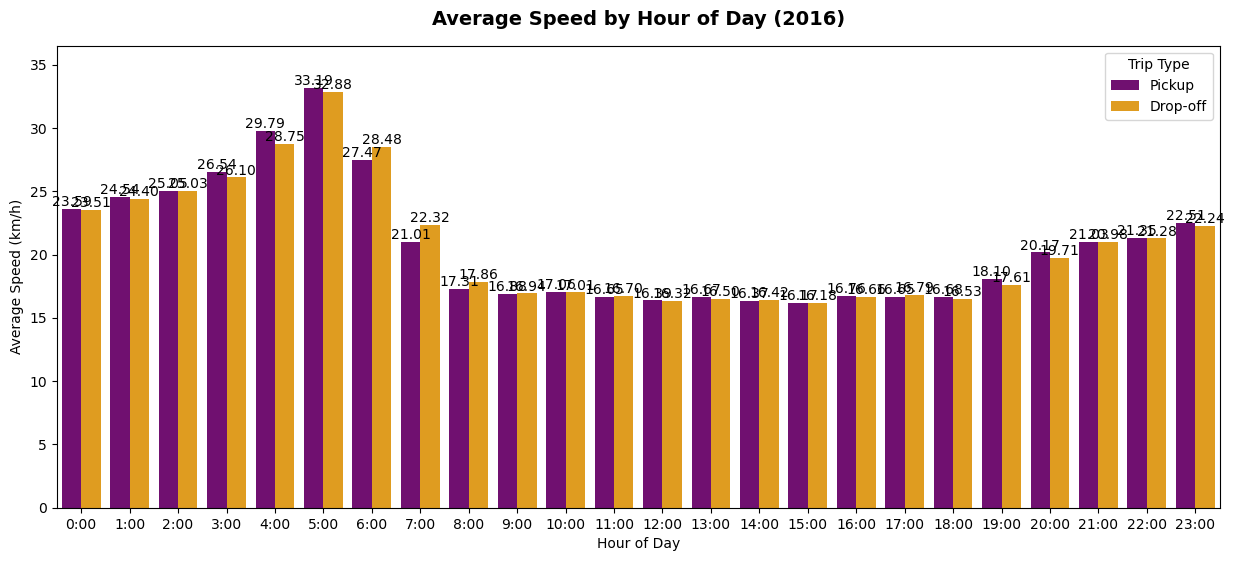

In [39]:
plot_average_speed_by_hour(df)

In [40]:
pickup_speeds = df.groupby('pickup_datetime_hour')['speed_osrm'].mean().reset_index()
pickup_speeds.rename(columns={'speed_osrm': 'pickup speed', 'pickup_datetime_hour': 'hour'}, inplace=True)

dropoff_speeds = df.groupby('dropoff_datetime_hour')['speed_osrm'].mean().reset_index()
dropoff_speeds.rename(columns={'speed_osrm': 'dropoff speed', 'dropoff_datetime_hour': 'hour'}, inplace=True)

hourly_speeds = pd.concat([pickup_speeds.set_index('hour'), dropoff_speeds.set_index('hour')], axis=1).reset_index().round(2)
hourly_speeds

,hour,pickup speed,dropoff speed
0,0,23.59,23.51
1,1,24.54,24.40
2,2,25.05,25.03
3,3,26.54,26.10
4,4,29.79,28.75
5,5,33.19,32.88
6,6,27.47,28.48
7,7,21.01,22.32
8,8,17.31,17.86
9,9,16.88,16.94


#### 18. Was the number of passengers related to trip duration?

**Analysis**
- The majority of the trips are for a single passenger (1,017,938 trips (70.83%)), with a significant drop for two-passenger trips (207,523 trips (14.44%)), and further decreases for trips with more passengers. The fewest trips occur with four passengers (27,997 trips (1.95%)).
- There doesn't appear to be a strong direct correlation between the number of passengers and the trip duration. The range of trip durations seems relatively similar across different passenger counts. The duration varies significantly within each passenger count category. For example, for one-passenger trips, trip durations range from a few seconds up to over 20,000 seconds. This trend is mirrored in other passenger counts. There is no clear pattern suggesting that an increase in the number of passengers results in longer or shorter trip durations.
- Outliers are present across all passenger counts, with some trips having unusually long durations (above 15,000 seconds / 4.17 hours). This could suggest external factors (such as traffic, trip distance, or other non-passenger-related factors) that may have more influence on trip duration.
- Trips with 3-6 passengers still show a wide range of trip durations, despite being a relatively smaller portion of the total trips (1%-5%).

**Recommendation**
- While the number of passengers doesn't seem to significantly influence trip duration, other factors like time of day, weather, or traffic congestion might have a stronger relationship with trip duration. These variables should be included in the next phase of analysis to identify any key drivers behind trip duration.
- If multi-passenger trips are less frequent, the company might consider optimizing resource allocation for one-passenger and two-passenger trips, which dominate the dataset. This could include dynamic pricing models, fleet management strategies, or promotions targeted towards solo riders.

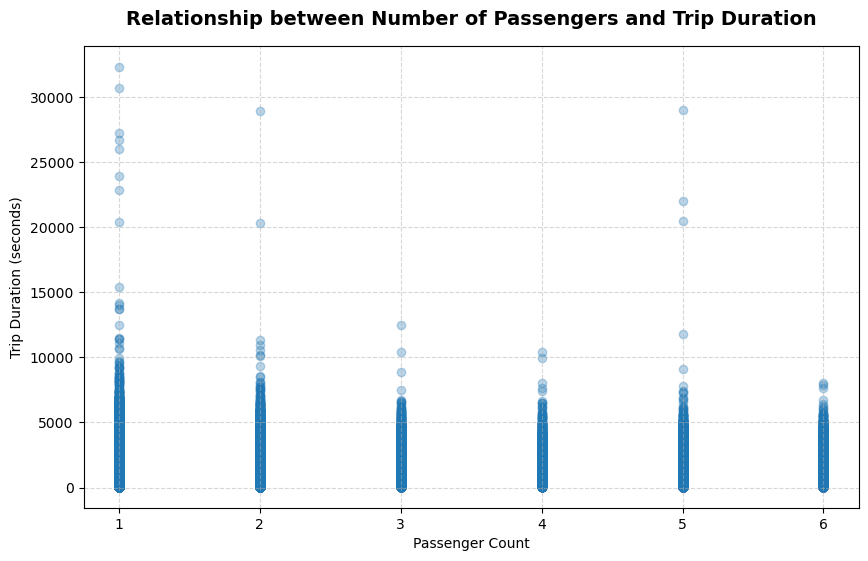

In [41]:
plot_passenger_trip_duration(df)

In [42]:
passenger_counts = df["passenger_count"].value_counts()
passenger_percentages = df["passenger_count"].value_counts(normalize=True) * 100

In [43]:
combined_df = pd.DataFrame({"count": passenger_counts, "percentage": passenger_percentages})
combined_df

,count,percentage
1,1017938,70.831063
2,207523,14.440049
5,77008,5.358439
3,59101,4.112418
6,47568,3.309919
4,27997,1.948112


#### 19. Did the number of passengers relate to the available vendors?

**Analysis**
- The majority of trips (both for Vendor 1 and Vendor 2) are for a single passenger. Vendor 1 handles slightly more trips than Vendor 2, with around 542,933 trips compared to 475,005 trips for Vendor 2. This dominance suggests that individual travel is the most common use case, which is typical in urban taxi services.
- There is a noticeable drop in trip counts for both vendors when there are two passengers, but Vendor 2 surpasses Vendor 1 in this segment. Vendor 2 has 116,296 trips, while Vendor 1 has 91,227 trips. This might indicate that Vendor 2 may have better offers or services catering to small groups of passengers.
- The trip count for three and four passengers continues to decrease significantly, with Vendor 2 still having a slightly larger share than Vendor 1. These low numbers suggest that larger groups seldom use taxis for commuting or that taxis have limited seating capacity.
- For 5 passengers, Vendor 2 dominates this category, with 76,676 trips, while Vendor 1 has a mere 332 trips. For 6 passengers, Vendor 2 again significantly leads, with 47,417 trips versus 151 trips for Vendor 1. This wide disparity suggests that Vendor 2 may offer larger-capacity vehicles, such as vans or SUVs, more frequently than Vendor 1.

**Recommendation**
- Vendor 1 should consider expanding its fleet to include more vehicles that can accommodate larger groups, especially vans or SUVs. This will allow them to better compete with Vendor 2 in the 5-6 passenger segments, where they are severely underperforming.
- Vendor 2 should continue to capitalize on its advantage in serving larger groups but may want to optimize its services for solo passengers, where it currently lags behind Vendor 1.

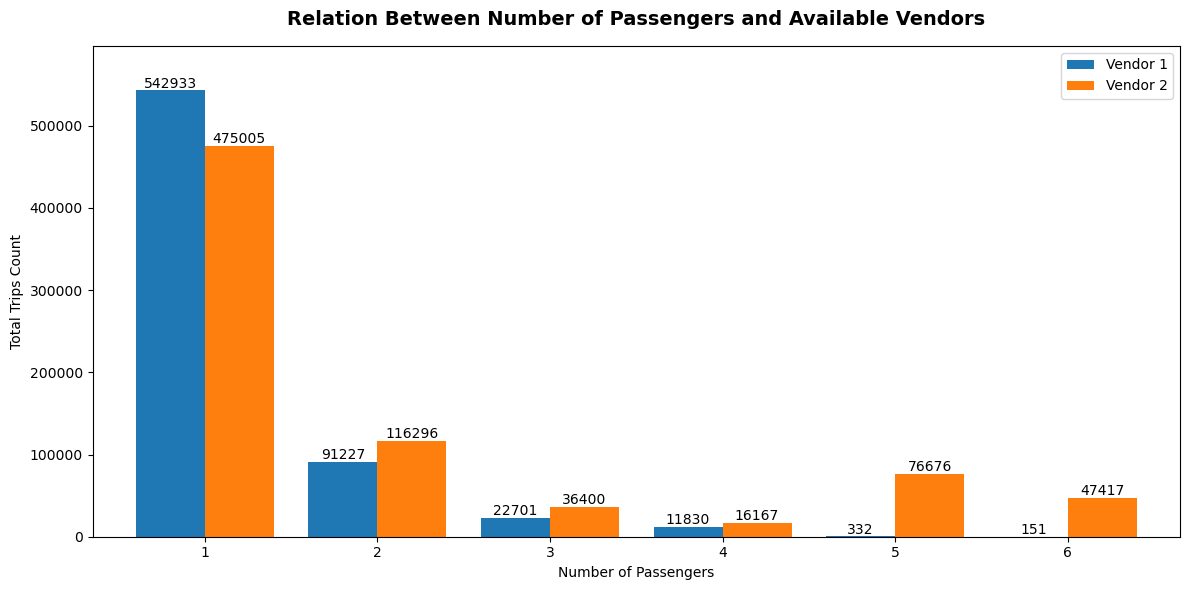

In [44]:
plot_passenger_vendor(df)

#### 20. What was the operational area for taxi trips in 2016?

**A. City-Level Analysis**

**New York City (NYC):**
- **Pickup Points:**
  - Dense activity in central Manhattan, Midtown, and the Financial District.
  - High pickup concentration in Brooklyn, especially Downtown Brooklyn and Williamsburg.
  - Airports like JFK and LaGuardia show moderate pickup density.
- **Dropoff Points:**
  - Similar to pickups, Manhattan sees the highest dropoff activity.
  - Brooklyn dropoffs align with pickup points, particularly in Downtown Brooklyn and Williamsburg.
  - Airports exhibit significant dropoff activity, aligning with commuter travel trends.

**New Jersey:**
- **Pickup Points:**
  - Concentrated in urban hubs like Jersey City, Newark, and Paterson.
  - Minimal pickup activity in suburban New Jersey.
- **Dropoff Points:**
  - High activity around Jersey City and Newark, with sparse dropoffs in less populated suburban areas.

**Long Island:**
- **Pickup Points:**
  - Moderate activity near the NYC border, particularly in areas like Hempstead.
  - Sparse pickups in eastern Long Island.
- **Dropoff Points:**
  - Concentrated around Nassau County suburbs near NYC, with limited activity in more distant areas.

**B. District-Level Analysis**

**Manhattan:**
- **Pickup Points:** High density in Midtown and Financial District.
- **Dropoff Points:** Reflects pickup patterns, particularly in Midtown and Financial District.

**Brooklyn:**
- **Pickup Points:** Active areas include Downtown Brooklyn and Williamsburg.
- **Dropoff Points:** Dropoffs align with pickups, emphasizing consistent travel demand.

**Queens:**
- **Pickup Points:** Significant near JFK and LaGuardia airports, with moderate activity elsewhere.
- **Dropoff Points:** Consistent with airport pickups, highlighting airport-related travel.

**C. Inter-City and Airport Connections**

- **Airport Pickup and Dropoff:** 
  - JFK and LaGuardia remain central to airport-related transportation, showing consistent pickup and dropoff rates.
  - Newark Liberty Airport sees moderate but consistent activity from New Jersey residents.
- **NYC-New Jersey Commuter Flow:** 
  - High commuter traffic, particularly between Manhattan and cities like Jersey City and Newark.

**D. Suburban Analysis (Long Island, NJ, and Westchester)**

**Long Island:**
- **Pickup and Dropoff Points:** Moderate activity concentrated near NYC borders, with sparse activity in the eastern regions.

**New Jersey:**
- **Pickup and Dropoff Points:** High concentration near NYC-adjacent urban hubs, with minimal activity in more distant suburban areas.

**Westchester:**
- **Pickup and Dropoff Points:** Moderate activity in southern areas like Yonkers, tapering off further north.

**E. Heat Map Analysis**

- **Core Activity:**
  - Manhattan remains the busiest hub, particularly Midtown and the Financial District.
  - High density also seen in Brooklyn, Jersey City, and Newark, indicating strong commuter and residential activity.
- **Peripheral Activity:**
  - Sparse activity in suburban and distant areas such as eastern Long Island and northern New Jersey.

**Recommendations**

1. **Service Expansion:**
   - Increase vehicle availability in core areas like Midtown, Downtown Brooklyn, and airports to meet high demand.
   - Explore targeted marketing for commuters traveling between NYC and Jersey City/Newark.
2. **Airport Optimization:**
   - Enhance services at JFK, LaGuardia, and Newark Liberty airports to streamline airport-related transportation.
3. **Suburban Outreach:**
   - Deploy limited resources to suburban hubs near NYC borders, particularly in Long Island and New Jersey, to address moderate demand.
4. **Data-Driven Adjustments:**
   - Use real-time data to adapt to pickup and dropoff patterns, especially during peak hours or events.


**New York City Map**

![New York City Map](img/nyc_map.png)

**Pickup point (heatmap + markers)**

![Pickup Heatmap Marker](img/pickup_heatmap_marker.png)

**Dropoff point (heatmap + markers)**

![Dropoff Heatmap Marker](img/dropoff_heatmap_marker.png)

**Pickup point (markers)**

![Pickup Marker](img/pickup_marker.png)

**Dropoff point (markers)**

![Dropoff Marker](img/dropoff_marker.png)

In [45]:
# # Testing
# df_map_test = df.copy()
# df_map_test = df_map_test.head(1000)
# pickup_heatmap = create_heatmap(df_map_test, 'pickup_latitude', 'pickup_longitude', 'pickup_heatmap')
# dropoff_heatmap = create_heatmap(df_map_test, 'dropoff_latitude', 'dropoff_longitude', 'dropoff_heatmap')

In [46]:
# %%time
# # running time = 20-30 mins
# pickup_heatmap = create_heatmap(df, 'pickup_latitude', 'pickup_longitude', 'pickup_heatmap')

In [47]:
# %%time
# # running time = 20-30 mins
# dropoff_heatmap = create_heatmap(df, 'dropoff_latitude', 'dropoff_longitude', 'dropoff_heatmap')

#### 21. Which areas allowed taxis to send data in real-time?

**A. City Level Analysis**

- **New York City and Surrounding Areas**: The map indicates a more dispersed pattern of pickup and drop-off activities, with significant activity in New York City and parts of Long Island and northern New Jersey. This shift suggests that while Manhattan remains a core hub, adjacent regions are experiencing a growing demand that could stress network resources.

**B. Sub-District Level Analysis**

1. **Manhattan**: Midtown Manhattan continues to show a high density of activity, though it appears slightly more distributed compared to previous maps. This suggests persistent network strain, albeit with potential relief in some zones.
2. **Brooklyn**: High activity is visible in Downtown Brooklyn and areas along the western and southern coastlines, indicating continued challenges with data transmission, particularly during peak periods.
3. **Queens**: Western Queens retains moderate activity, with hotspots emerging near central Queens, signaling increased demand.
4. **Long Island**: Activity is notably spread across Nassau County and parts of Suffolk County, highlighting emerging clusters that require infrastructure assessment.
5. **Northern New Jersey**: Areas around Jersey City and Newark exhibit noticeable clustering, suggesting these areas could face connectivity issues as demand rises.


**C. Specific Areas of Concern**

1. **Midtown Manhattan, Downtown Brooklyn, and Western Queens**: Persistent clustering suggests these areas remain at risk of network congestion and data transmission delays.
2. **Nassau County and Western Long Island**: New clusters in this region emphasize the need for proactive infrastructure development to accommodate demand.
3. **Jersey City and Newark**: Activity in these areas highlights the need for network support, particularly for peak commuting times.

**Recommendations**

1. **Infrastructure Enhancements in High-Demand Zones**
   - Expand network capacity in **Midtown Manhattan, Downtown Brooklyn**, and **Western Queens** to mitigate congestion and enhance service reliability.
2. **Focus on Emerging Areas**
   - Invest in infrastructure upgrades for **Nassau County** and **Western Long Island** to address growing activity and prevent future network delays.
3. **Optimize Support in Northern New Jersey**
   - Collaborate with local internet providers to identify bottlenecks around **Jersey City** and **Newark**, enhancing data flow efficiency during peak periods.
4. **Pilot Testing for Resilience**
   - Launch pilot programs targeting network performance in **coastal Brooklyn** and **Nassau County**, focusing on handling surge periods effectively and identifying upgrade priorities.

![Send Data Heatmap](img/snd_heatmap.png)

![Send Data Heatmap](img/snd_marker.png)

In [48]:
# send_data_real_time = df[df['store_and_fwd_flag'] == 'Y']

# combined_coordinates = pd.concat([
#     send_data_real_time[['pickup_latitude', 'pickup_longitude']],
#     send_data_real_time[['dropoff_latitude', 'dropoff_longitude']].rename(columns={
#         'dropoff_latitude': 'pickup_latitude', 
#         'dropoff_longitude': 'pickup_longitude'
#     })
# ])

In [49]:
# combined_coordinates.info()

In [50]:
# %%time
# # running time = 1 mins
# send_data_real_time_area = create_heatmap(combined_coordinates, 'pickup_latitude', 'pickup_longitude', 
#                                           'send_data_real_time_heatmap')

#### 22. Did the ability to send data in real-time affect taxi trip duration?

**Analysis**

- Distribution of Taxi Trips by Store and Forward Flag (Bar Chart):
    - The first bar chart shows that the vast majority of trips (99.5%) have the `store_and_fwd_flag` set to "N", indicating that these trips were transmitted in real-time. A very small portion (0.5%) of the trips were flagged as "Y", meaning the data was stored and forwarded later. This suggests that almost all taxis are capable of sending data in real-time, which is beneficial for monitoring operational efficiency.
- Effect of Store-and-Forward Flag on Taxi Trip Duration (Box Plot):
    - The second box plot shows that the trip duration distribution differs between the two groups. For trips transmitted in real-time (`store_and_fwd_flag = N`), the duration varies significantly, with an extreme outliers where trip times extend beyond 20,000 seconds (around 5.5 hours). These outliers likely indicate unusual trips, possibly caused by traffic, system glitches, or very long-distance trips.
    - Conversely, for trips where data was stored and forwarded later (`store_and_fwd_flag = Y`), the trip durations are generally shorter and more consistent, with fewer extreme outliers. This might suggest that when data is not transmitted in real-time, taxis are either limited to shorter trips or might operate in areas where real-time data transmission is less feasible.
- Conclusion:
    - The presence of extreme outliers in the real-time data group (`store_and_fwd_flag = N`) indicates that real-time data transmission may reflect a more accurate representation of trip conditions, including traffic, system errors, or long-distance trips.
    - The smaller and more consistent trip durations observed in the stored-and-forwarded group (`store_and_fwd_flag = Y`) could indicate that such trips are generally shorter or limited by factors affecting data transmission.

**Recommendations**

- Further Investigation into Long Trips:
    - The company should investigate the causes of the unusually long trips in the real-time data group. These could be legitimate long-distance trips, but may also reflect inefficiencies such as unreported stops or system errors. Identifying these outliers can provide insights into improving operational efficiency.
- Enhance Real-Time Data Transmission:
    - Given the small percentage of trips where data is not transmitted in real-time, it is recommended to upgrade or enhance infrastructure to support real-time data transmission across all trips. This would improve data reliability and operational monitoring.
- Operational Adjustments Based on Trip Duration Patterns:
    - The company might consider identifying any specific conditions (e.g., location, time of day) where trips are flagged as `store_and_fwd_flag = Y`. If these trips are generally shorter, optimizing resources for these situations may improve efficiency.

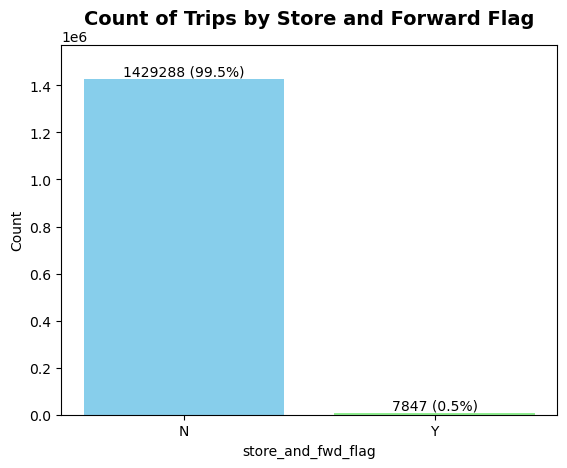

In [51]:
plot_store_and_fwd_trip_counts(df)

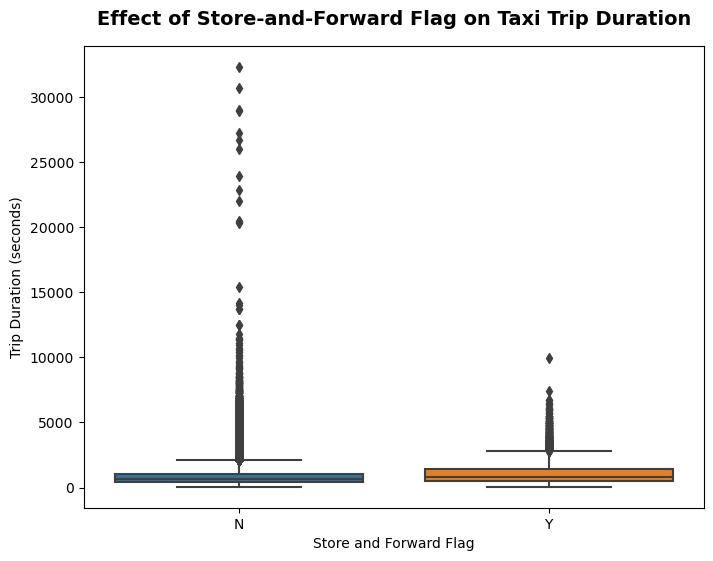

In [52]:
plot_store_and_fwd_trip_duration(df)

#### 23. Did the ability to send data in real-time depend on how far or close the distance was?

**Analysis**
- The median trip distance for both 'N' and 'Y' categories is similar, although the 'Y' group has a slightly higher median. This indicates that on average, trips where data is stored and forwarded tend to cover slightly longer distances.
- The IQR (Interquartile Range), which represents the middle 50% of the data, is wider for trips with the 'Y' flag compared to those with 'N'. This suggests more variability in trip distances when the data is stored and forwarded rather than transmitted in real-time.
- Both categories exhibit outliers, with the 'N' group having a significant number of extreme outliers, indicating some very long-distance trips. The 'Y' group also has outliers, but fewer compared to the 'N' group.
- The maximum trip distance for both categories appears to be comparable. However, the presence of more extreme outliers in the 'N' group may suggest that some trips are recorded as longer in real-time transmission.
- While the store-and-forward mechanism ('Y') may be associated with slightly longer trips, the real-time transmission ('N') group exhibits more variability in trip distance. This could imply that the ability to transmit data in real-time is either used for a broader variety of trips or more likely to capture longer, abnormal trips.

**Recommendation**
- Real-time data transmission ('N') appears to capture a wider range of trip distances, including many outliers. This may be an opportunity to enhance monitoring of long trips in real-time, providing better insights into trip patterns and potentially identifying anomalies such as inefficient routes or fraudulent activity.
- The presence of significant outliers in both groups, especially the 'N' group, indicates the need for an outlier detection system. Identifying trips with unusually long distances can help in operational cost-saving, route optimization, and detection of abnormal behaviors (e.g., driver detours or technical data issues).

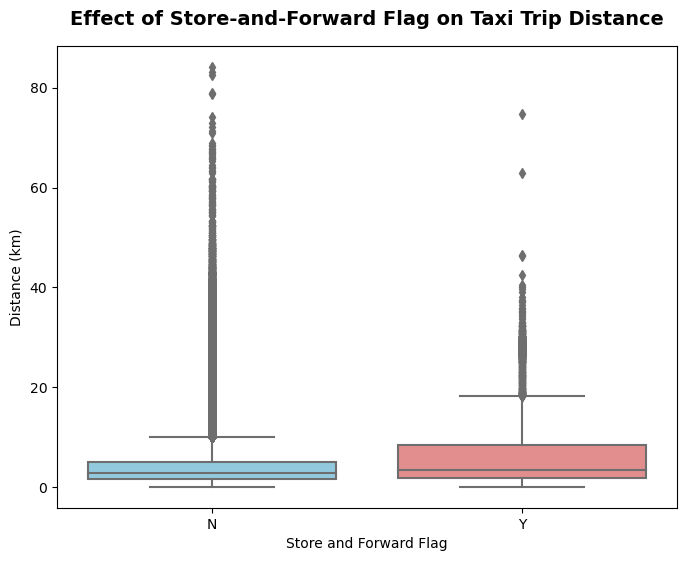

In [53]:
plot_store_and_fwd_trip_distance(df)